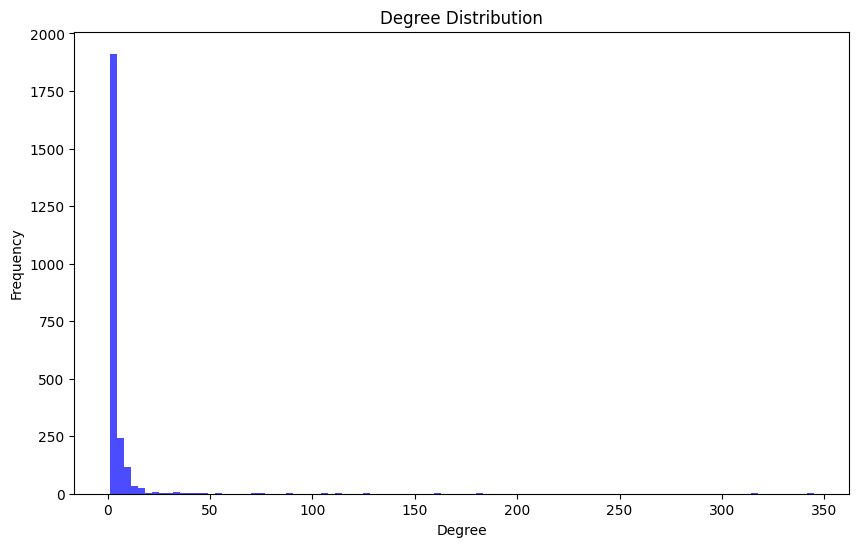

basic_stats
{'Number of nodes': 2374, 'Number of edges': 5049, 'Density': 0.0017924907100414626, 'Transitivity': 0.015161879201648637}
average clustering coefficient
0.08309973323692593
top 10 betweeness
[(6250, 0.20669279844619112), (78367, 0.17272668073850816), (124088, 0.10627443822070486), (106320, 0.10137100499371701), (160024, 0.06792089924857823), (92773, 0.0618360470994002), (3646, 0.05515493997287441), (85822, 0.05322348317758759), (69811, 0.05041734008127037), (51508, 0.048581974492305356)]
number of communities
79


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Load the datasets
edges = pd.read_csv("C:/Users/pyo20/OneDrive/Desktop/Classes/IEMS341/Project/random_edges.csv")
features = pd.read_csv("C:/Users/pyo20/OneDrive/Desktop/Classes/IEMS341/Project/random_features.csv")

# Create a graph
G = nx.from_pandas_edgelist(edges, source='numeric_id_1', target='numeric_id_2')

# Basic network statistics
basic_stats = {
    "Number of nodes": G.number_of_nodes(),
    "Number of edges": G.number_of_edges(),
    "Density": nx.density(G),
    "Transitivity": nx.transitivity(G)
}

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Clustering coefficient
clustering_coeffs = nx.clustering(G)
avg_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Top 10 nodes by betweenness centrality
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Community detection using Louvain method
communities = community.louvain_communities(G)
num_communities = len(communities)

# Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=100, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Results
print("basic_stats")
print(basic_stats)
print("average clustering coefficient")
print(avg_clustering_coeff)
print("top 10 betweeness")
print(top_10_betweenness)
print("number of communities")
print(num_communities)


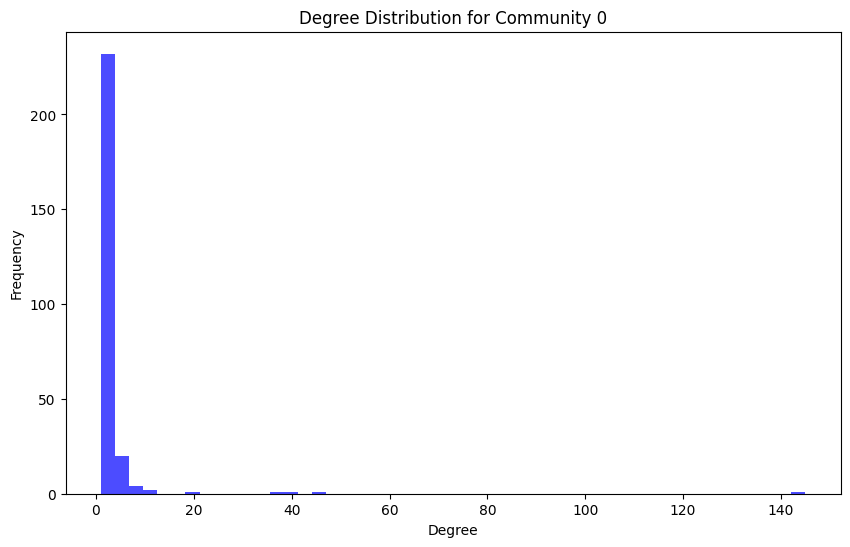

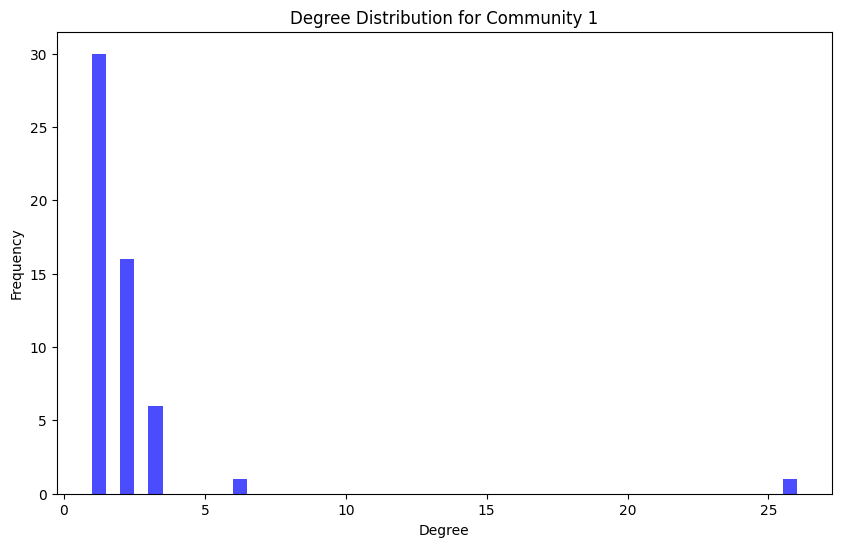

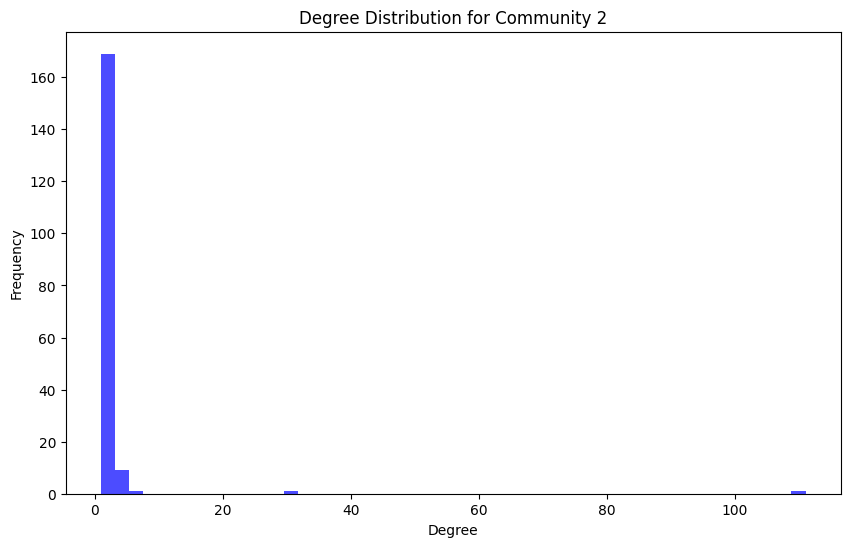

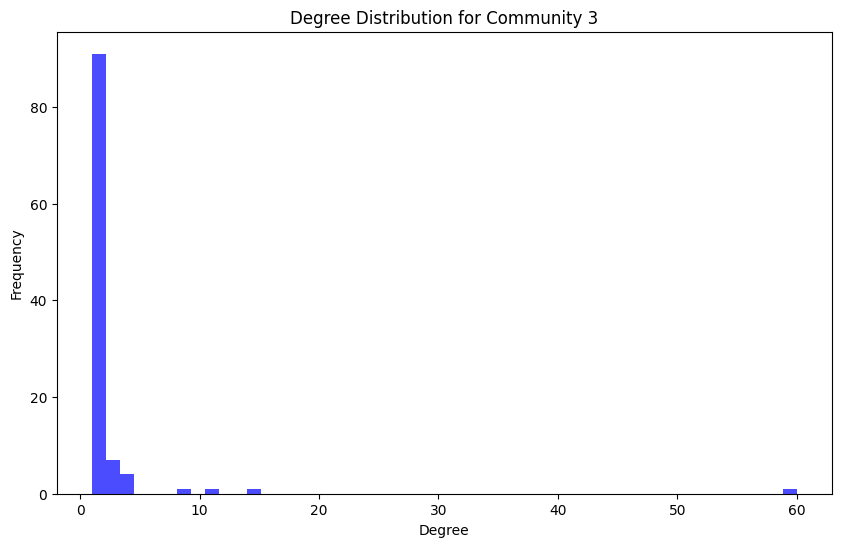

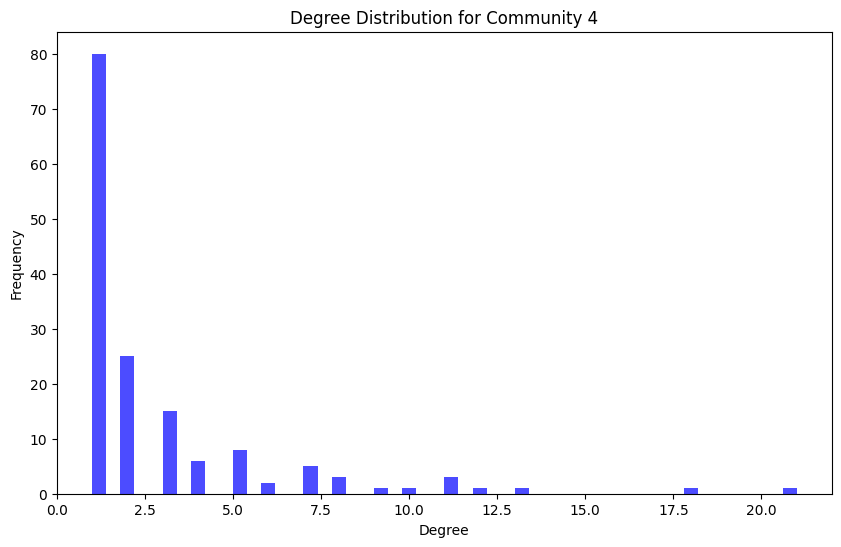

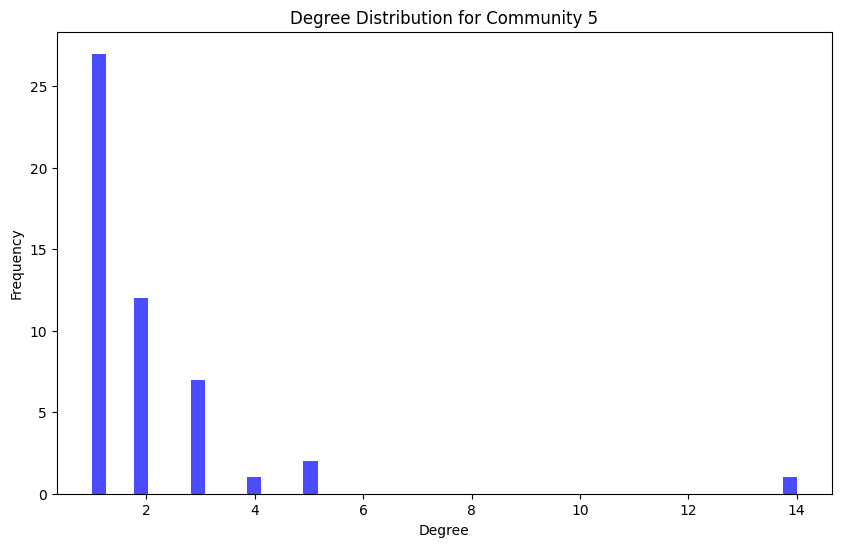

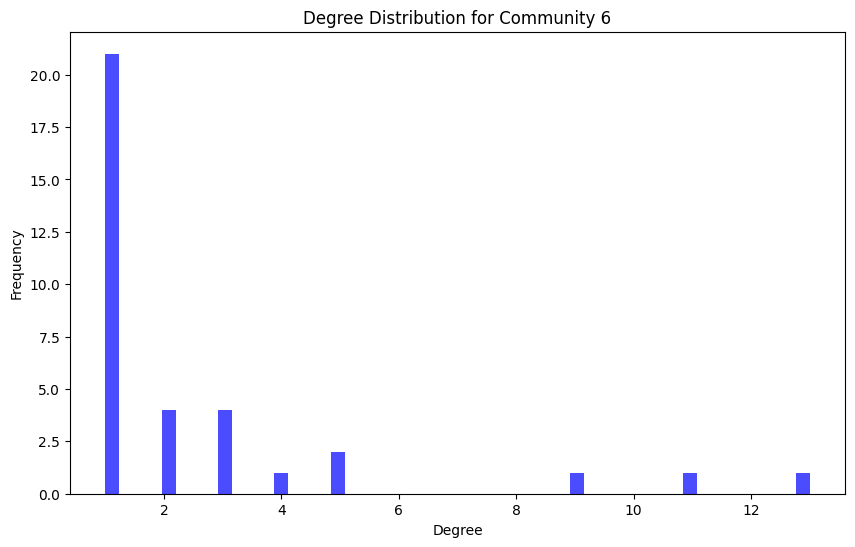

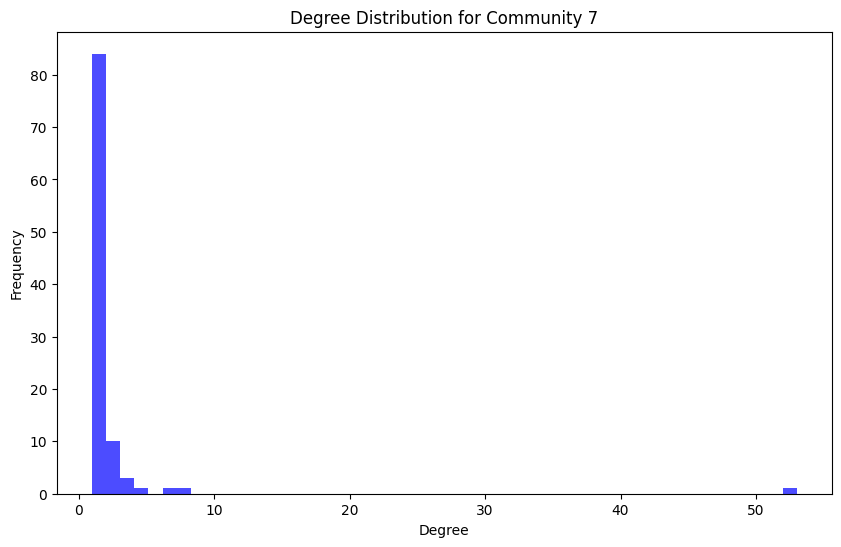

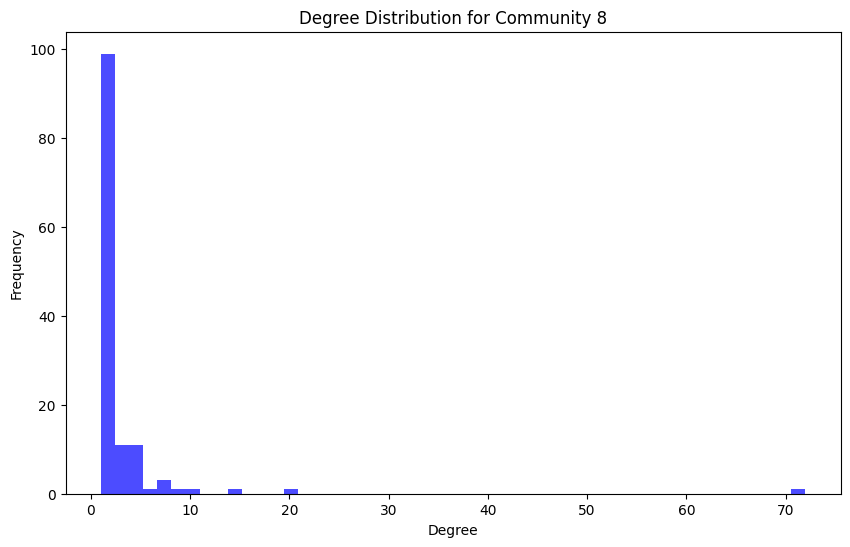

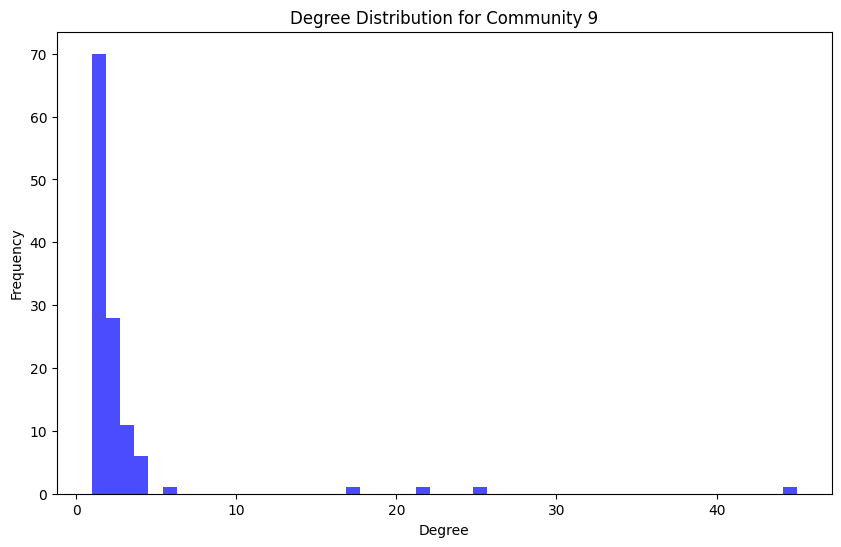

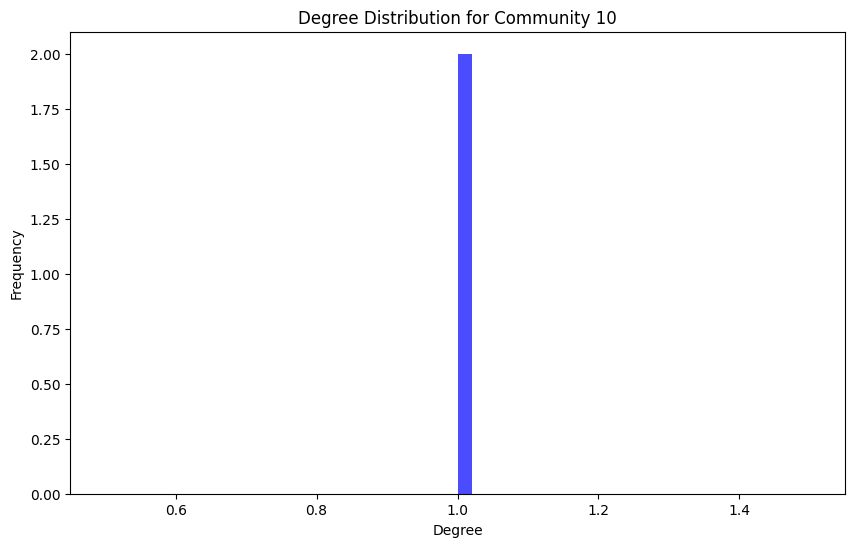

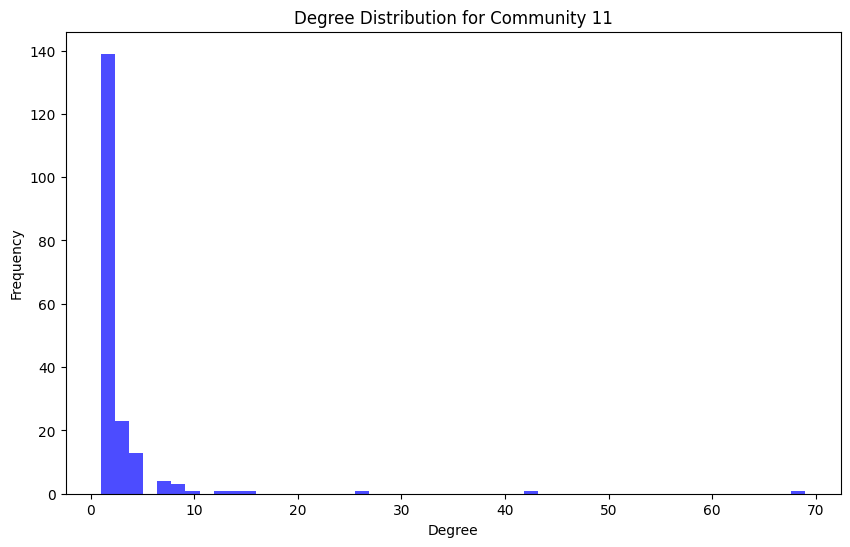

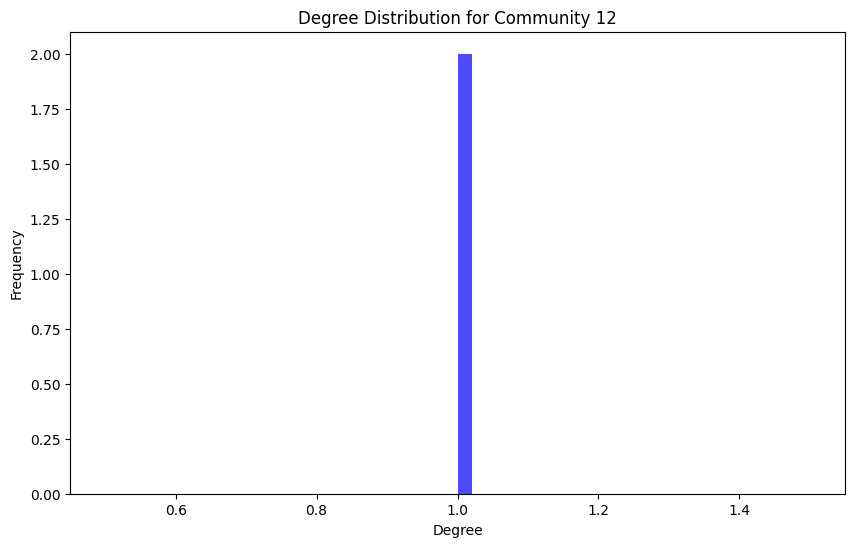

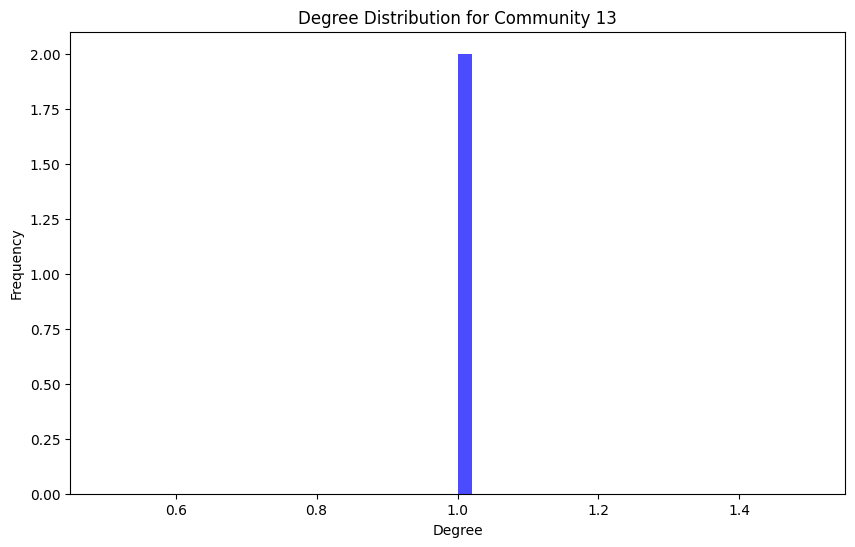

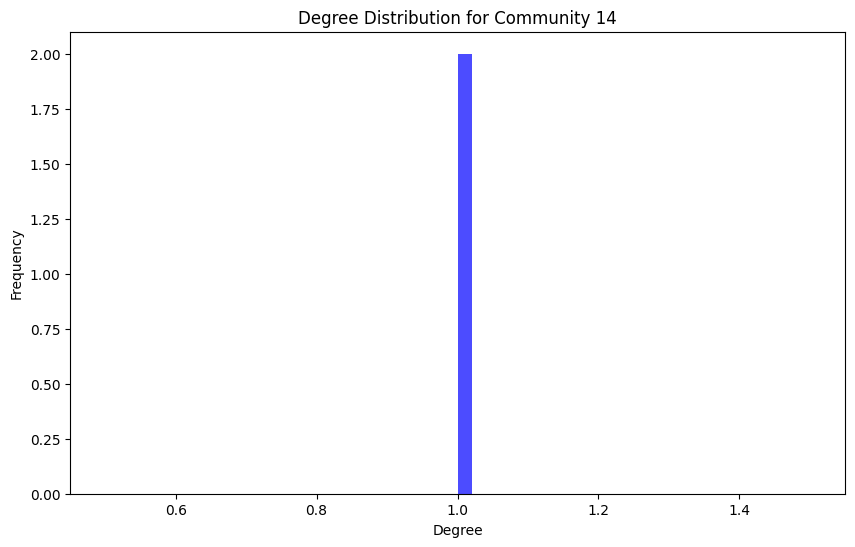

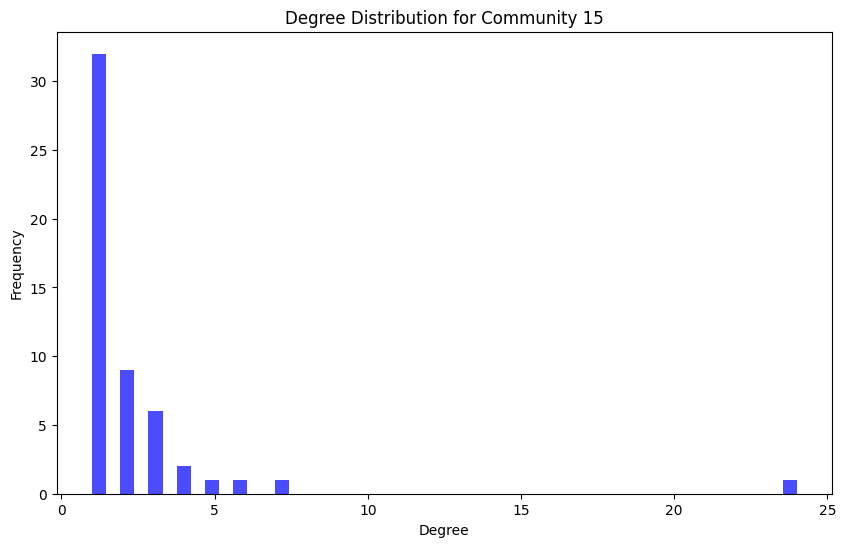

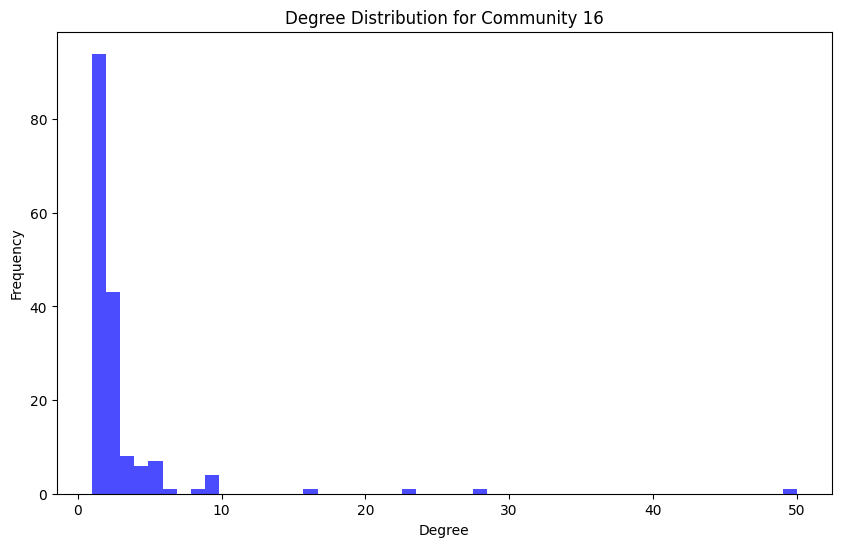

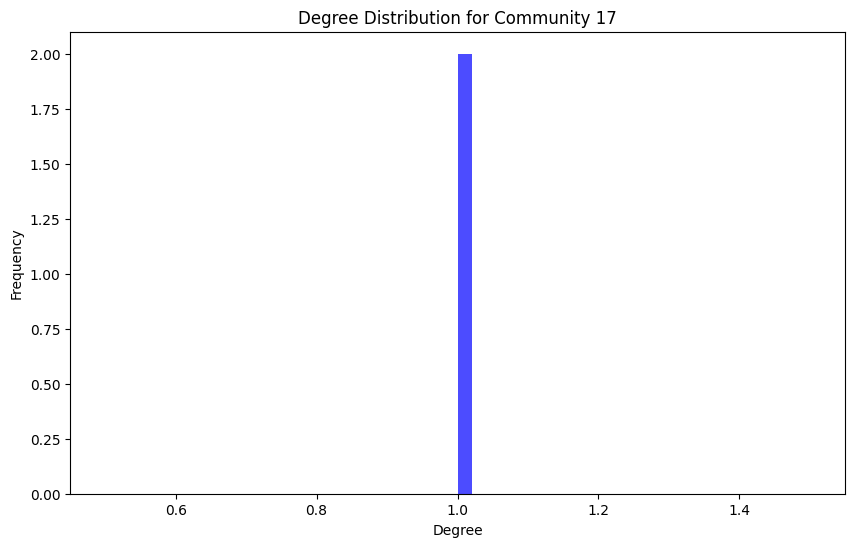

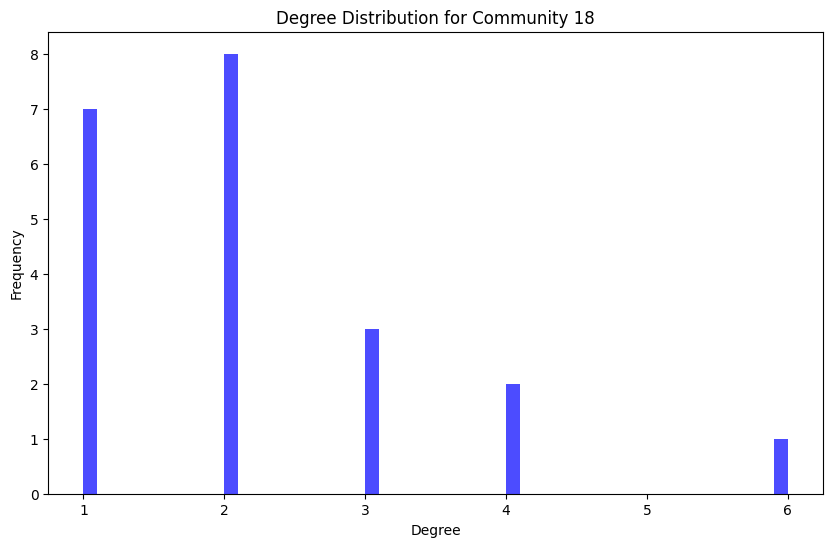

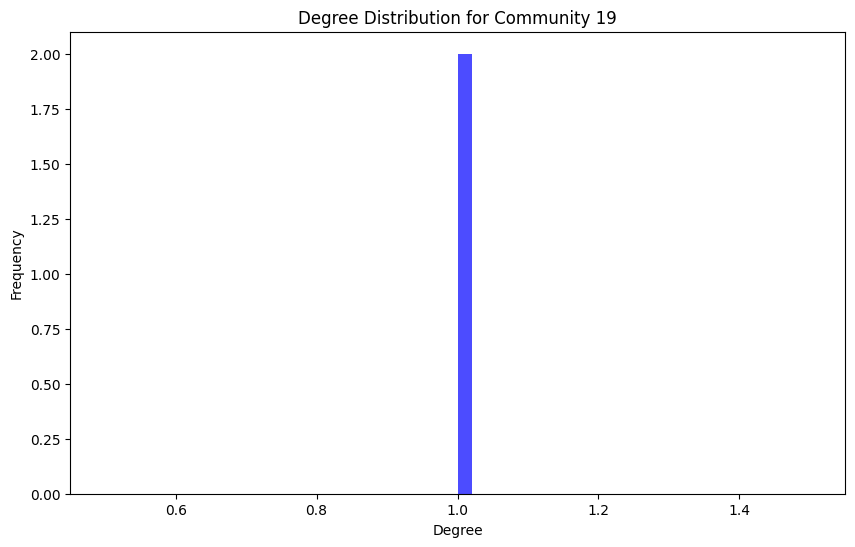

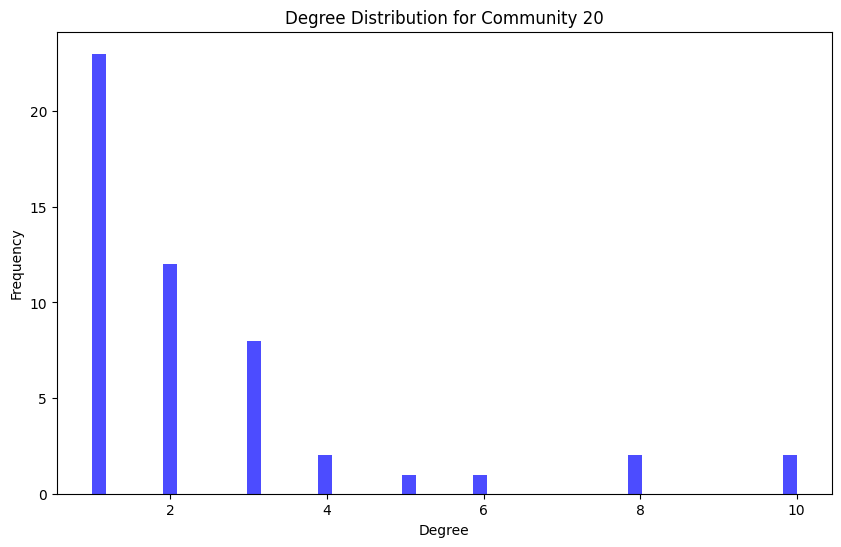

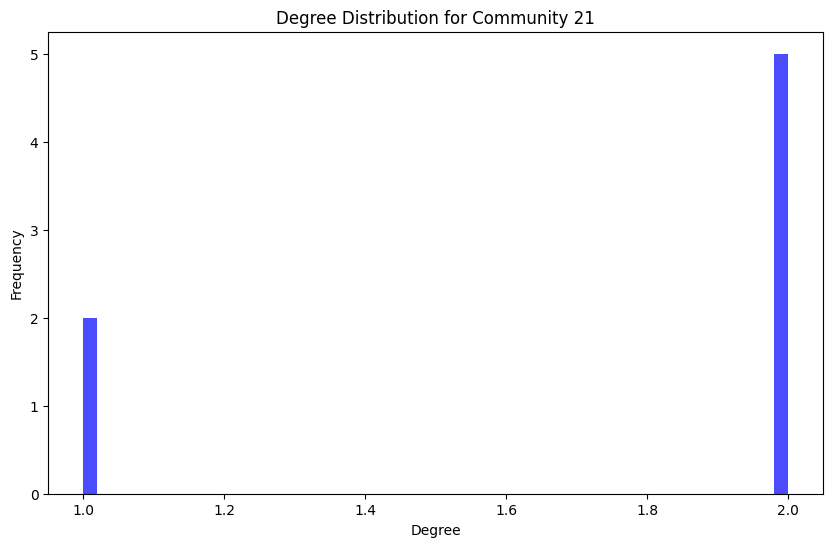

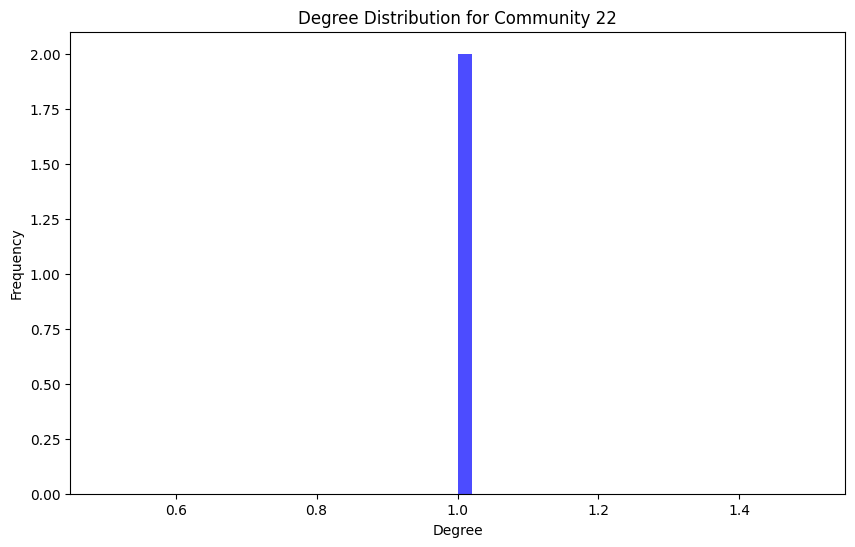

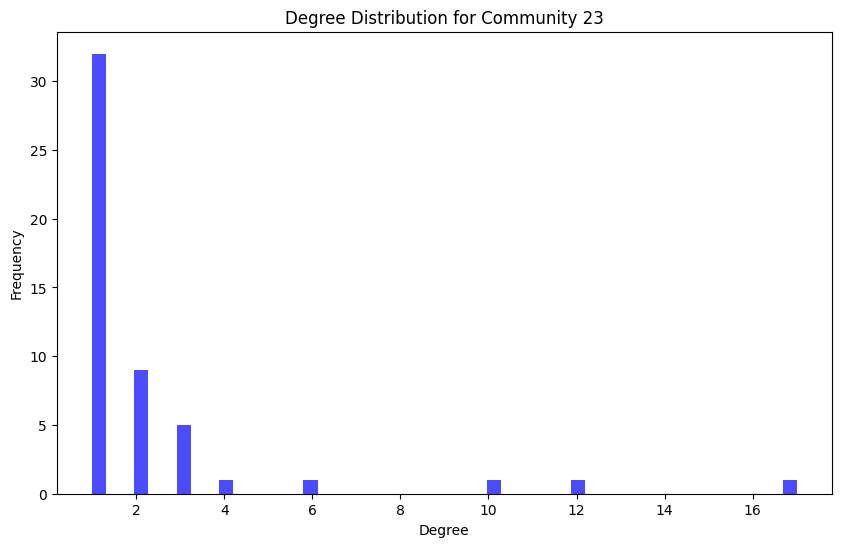

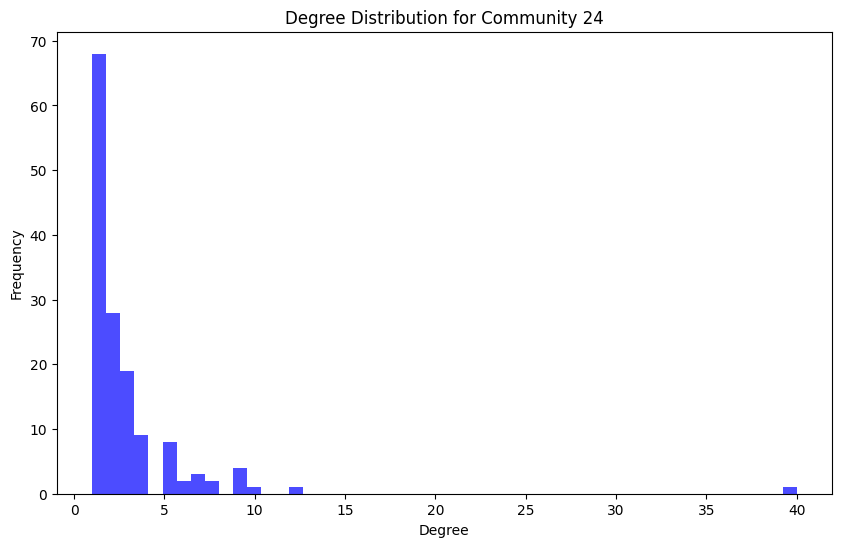

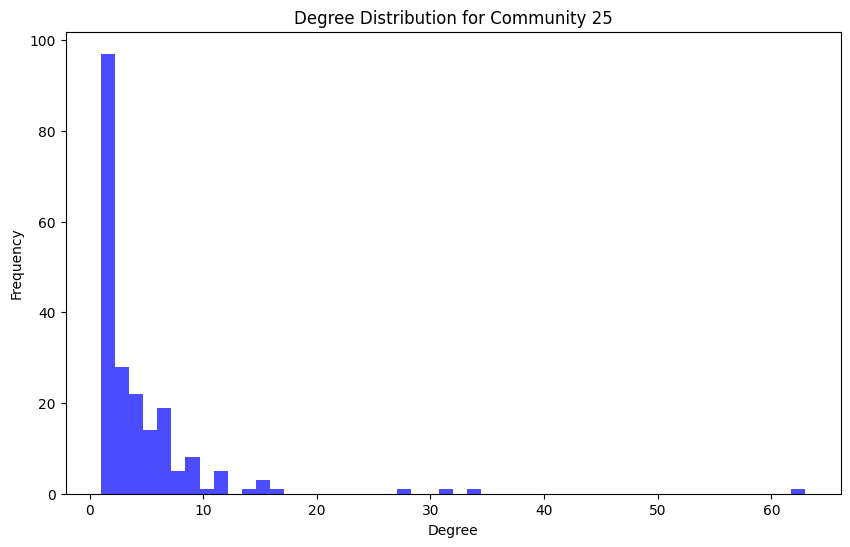

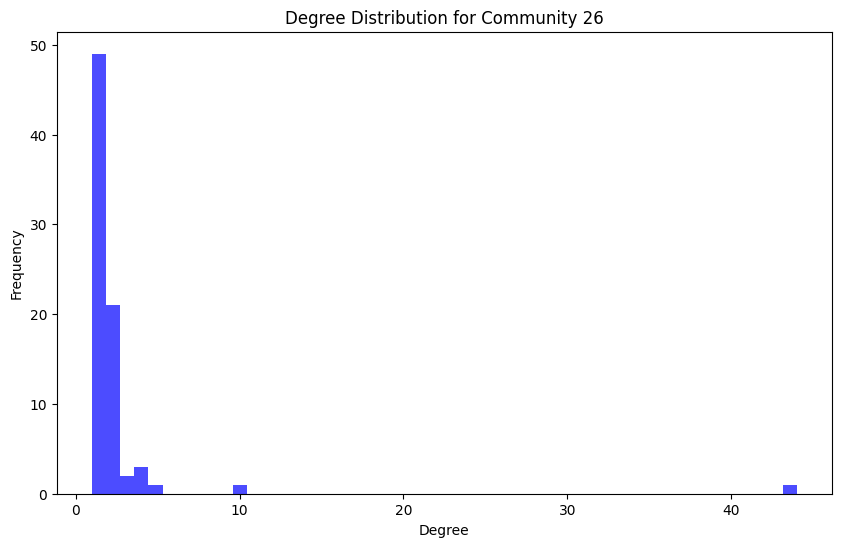

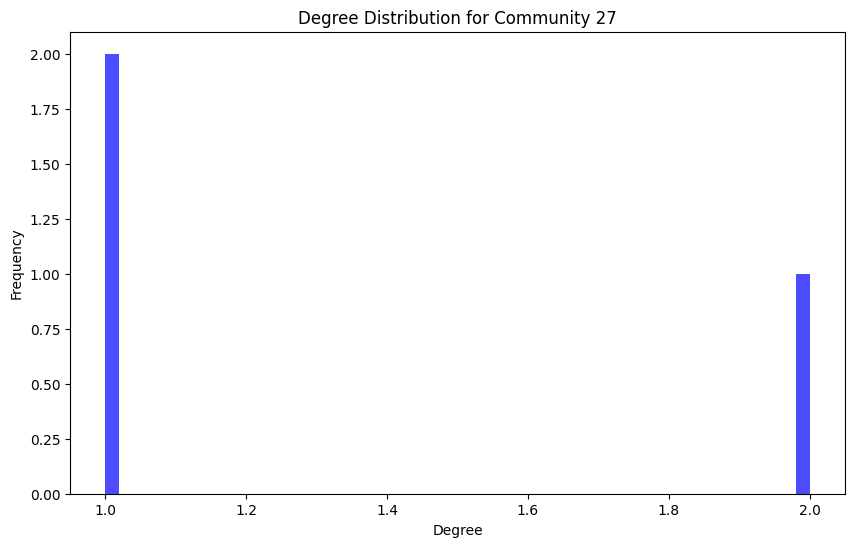

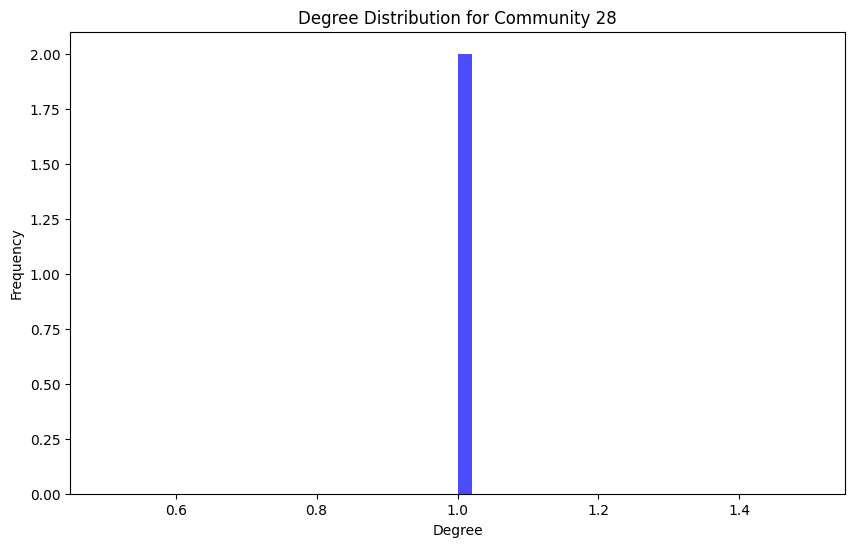

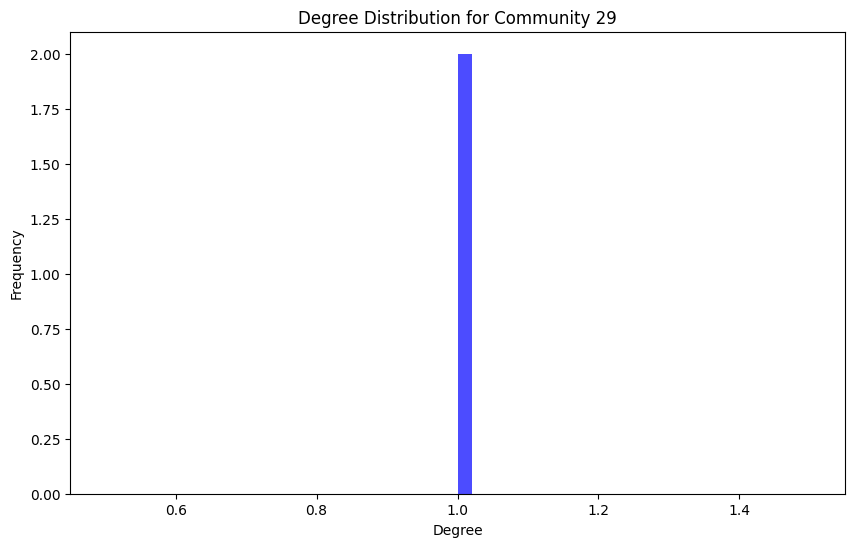

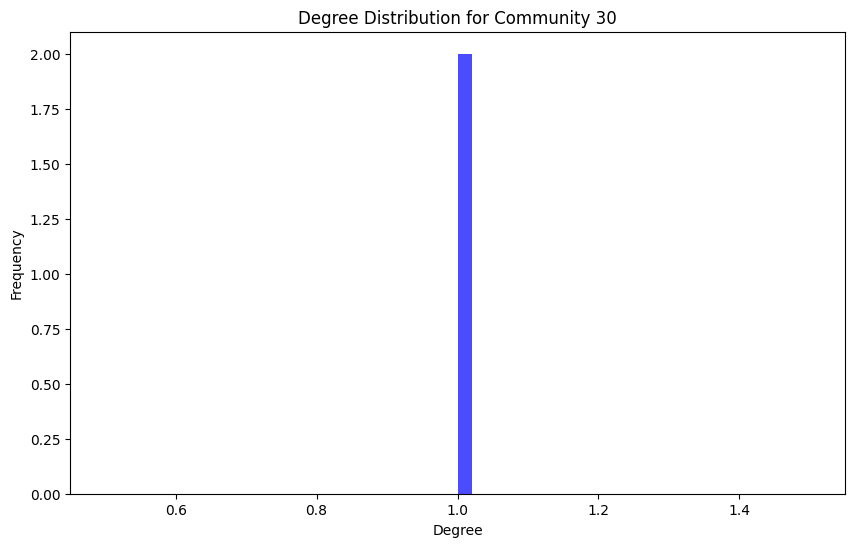

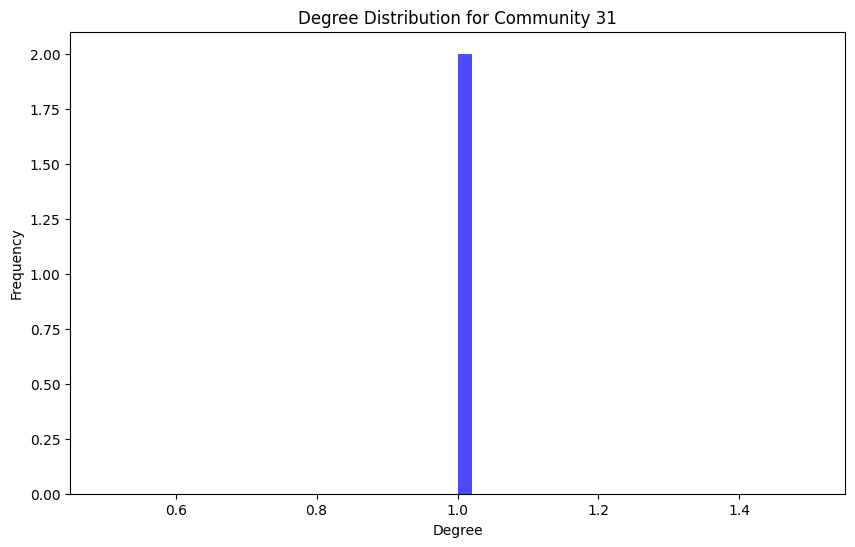

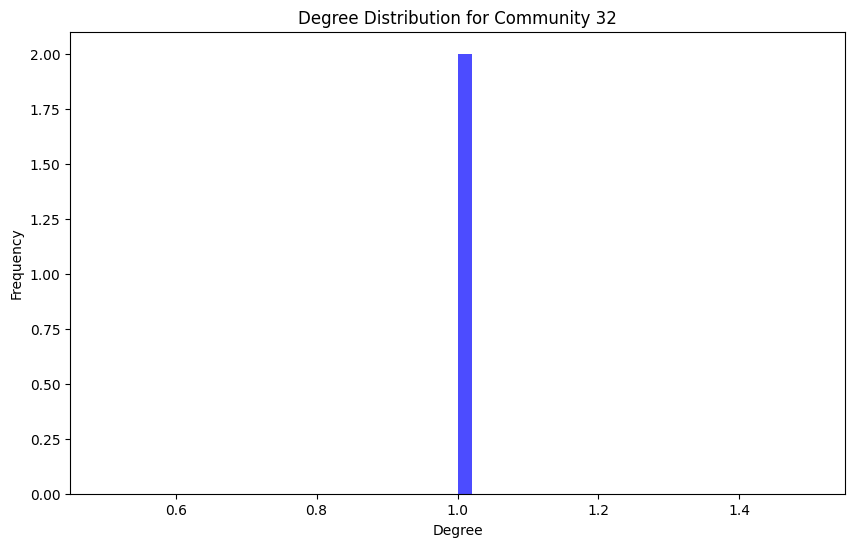

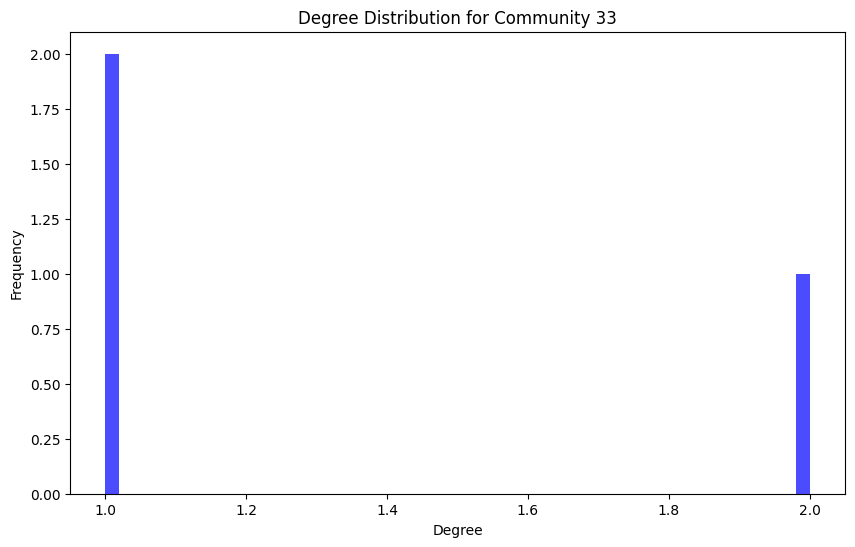

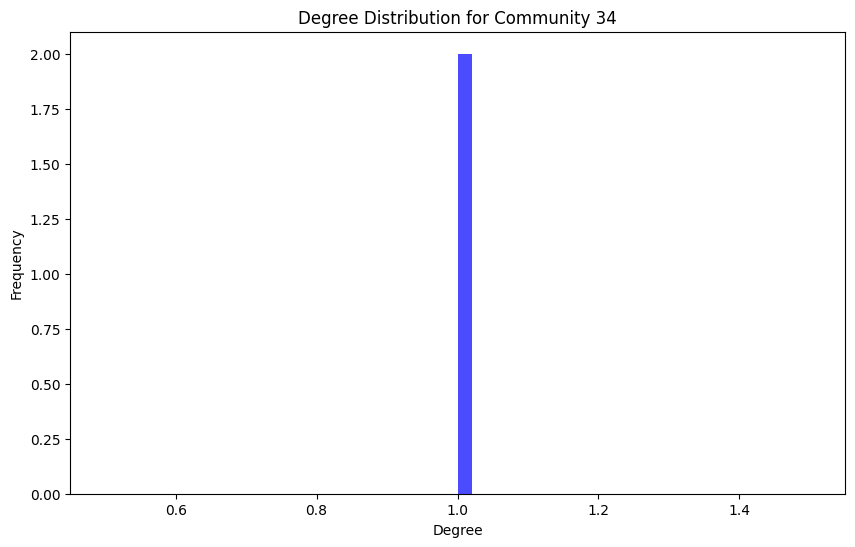

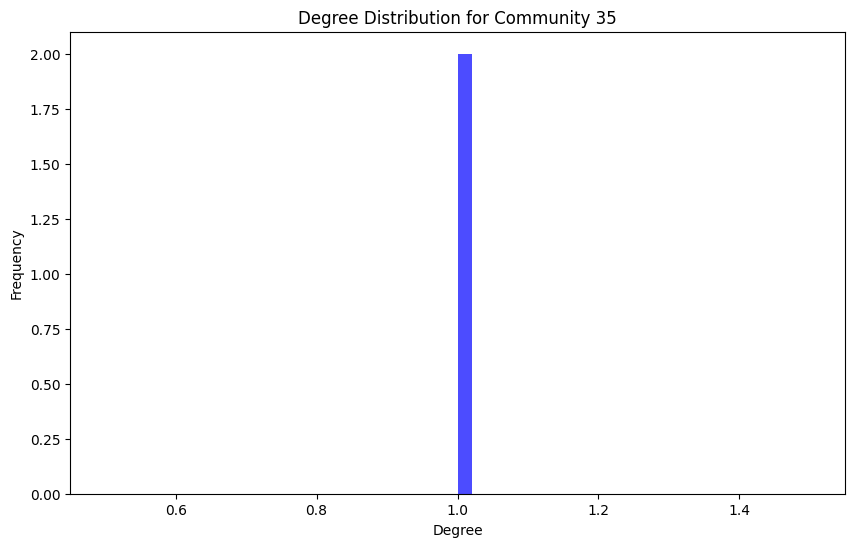

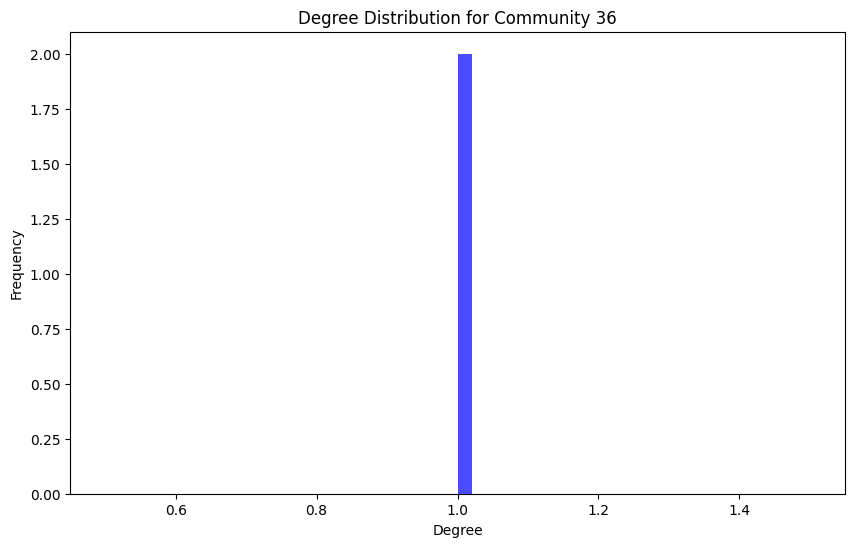

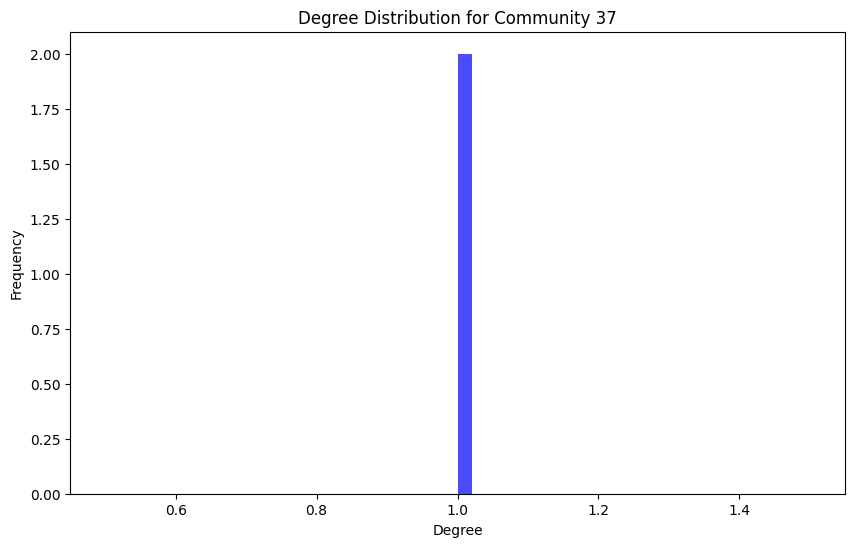

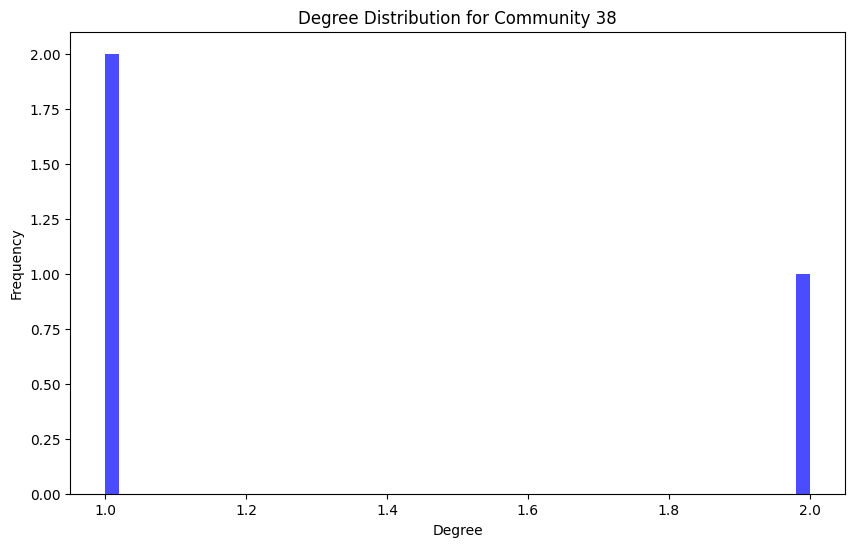

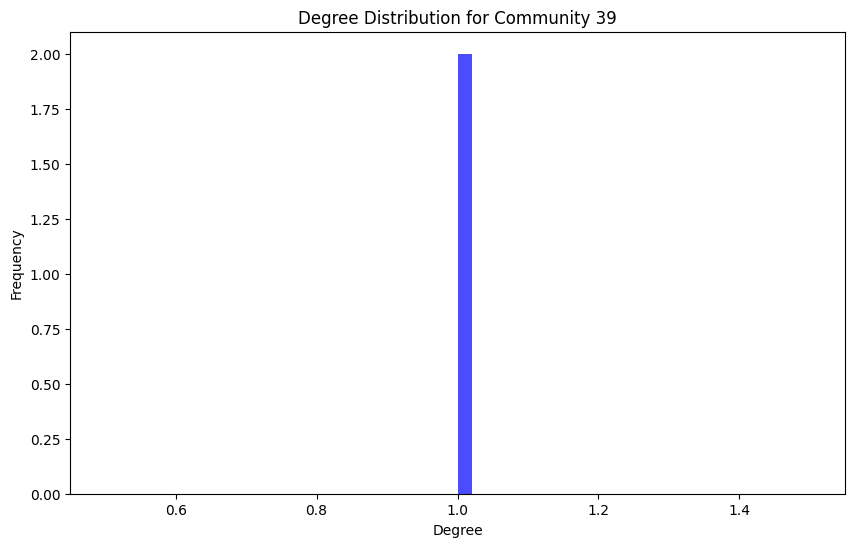

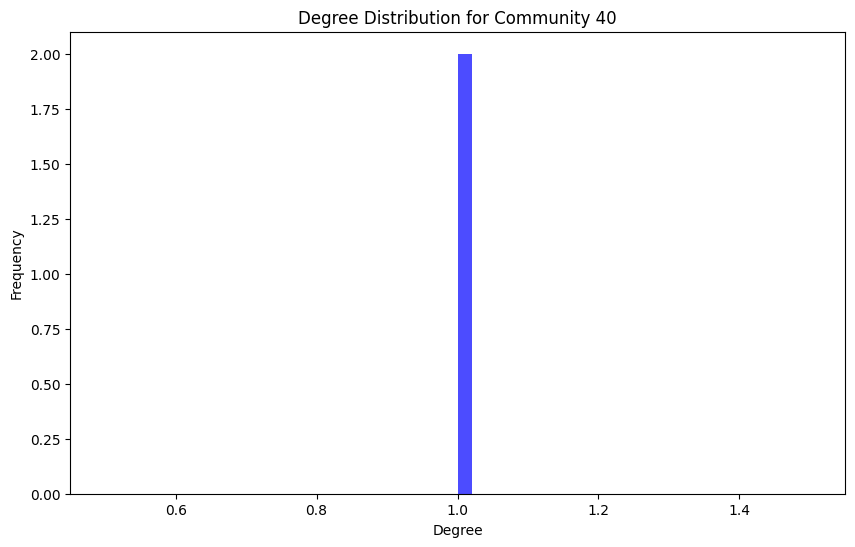

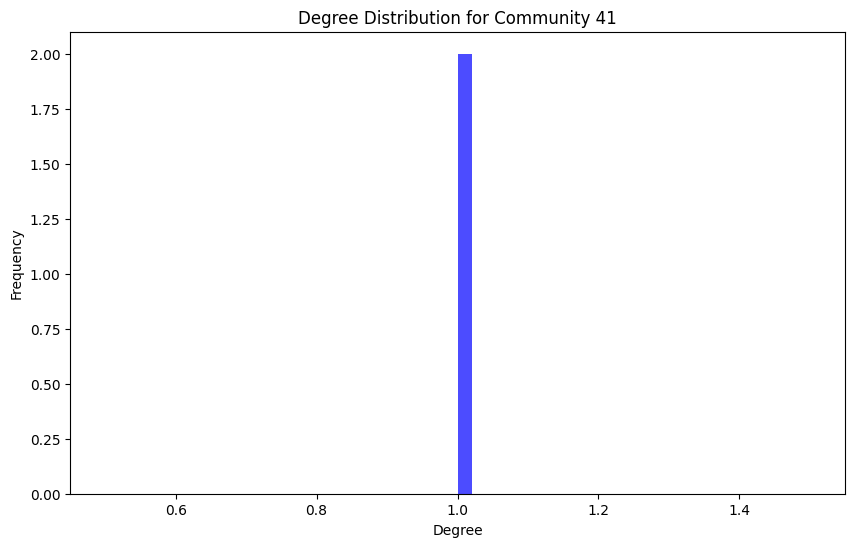

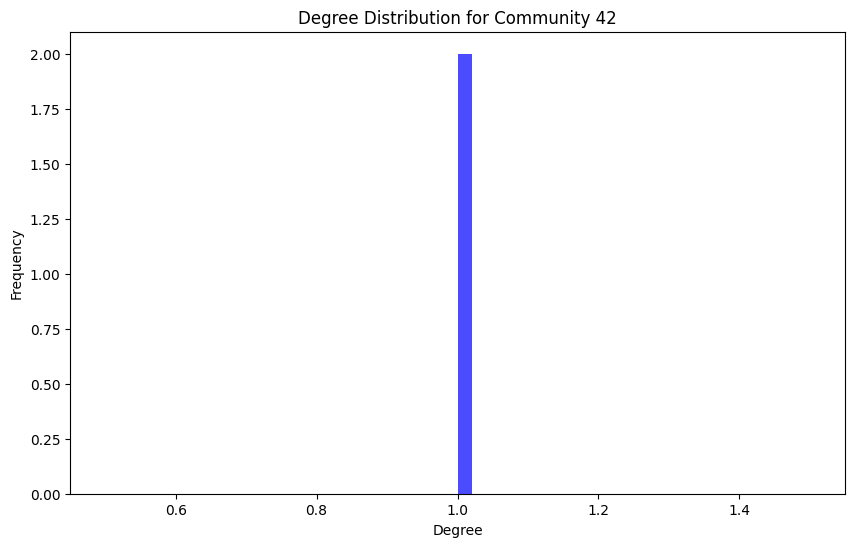

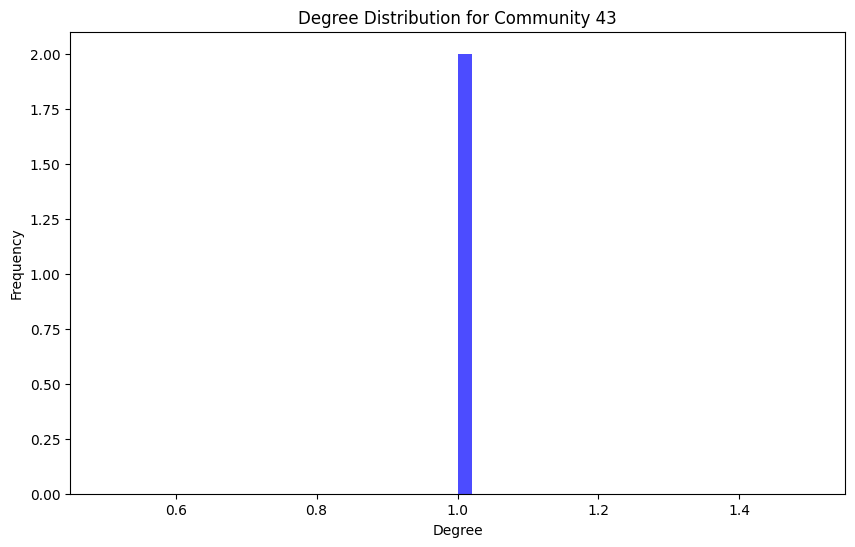

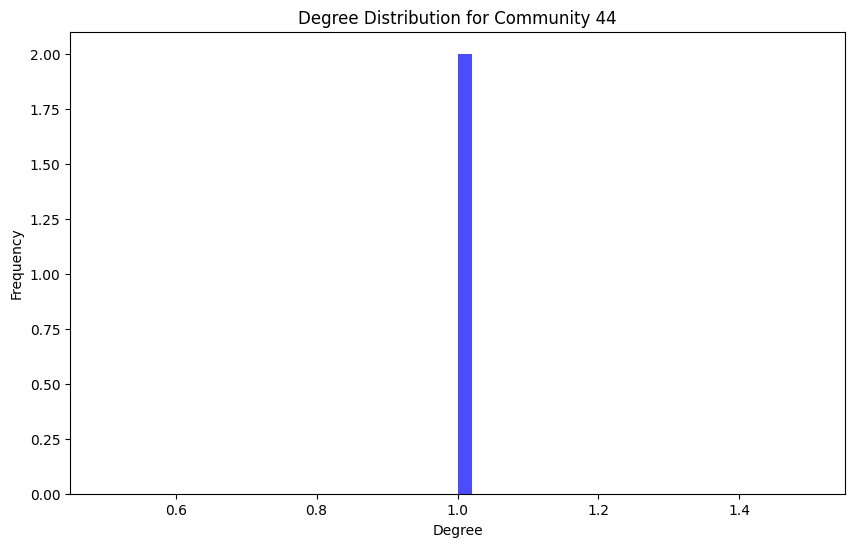

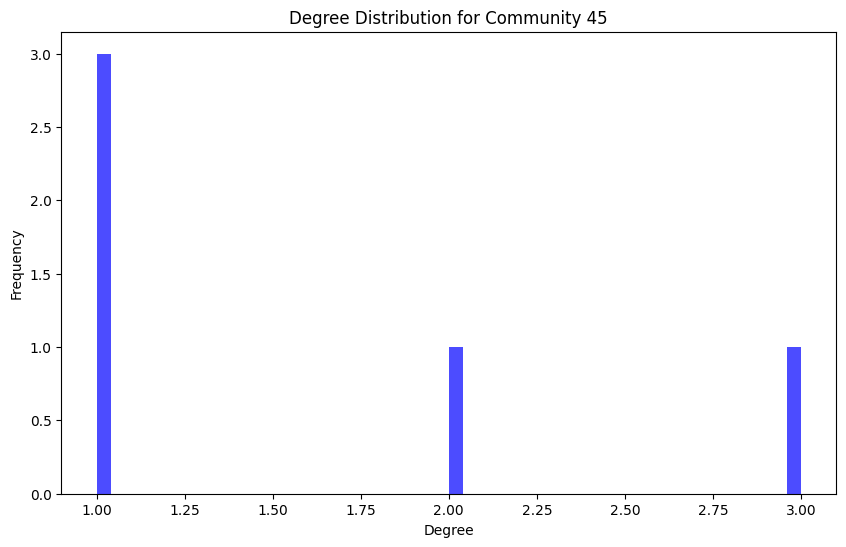

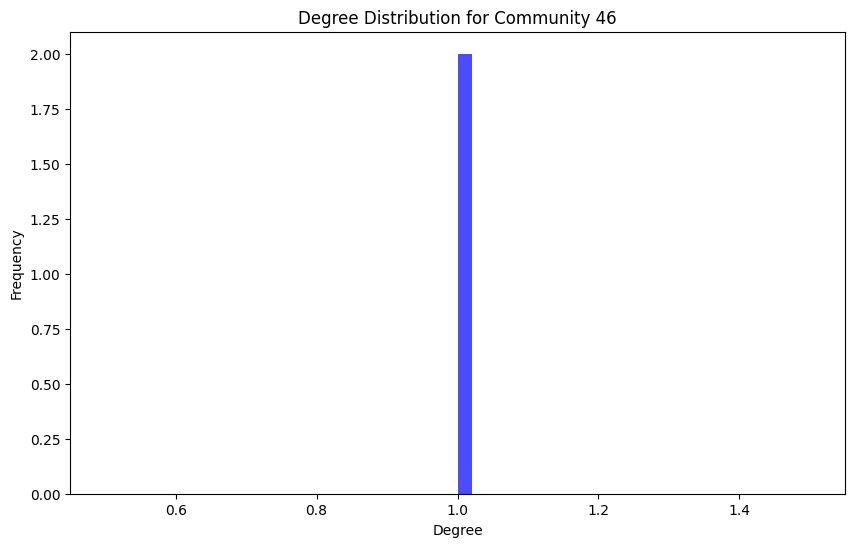

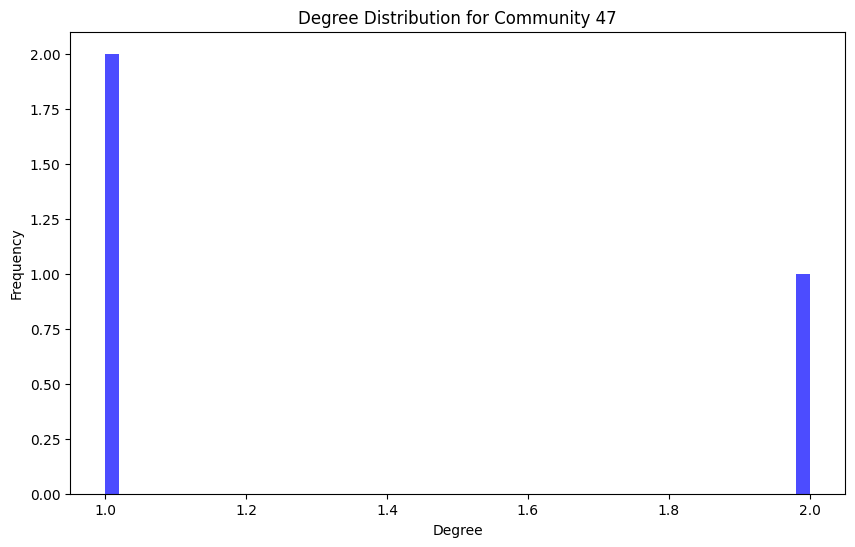

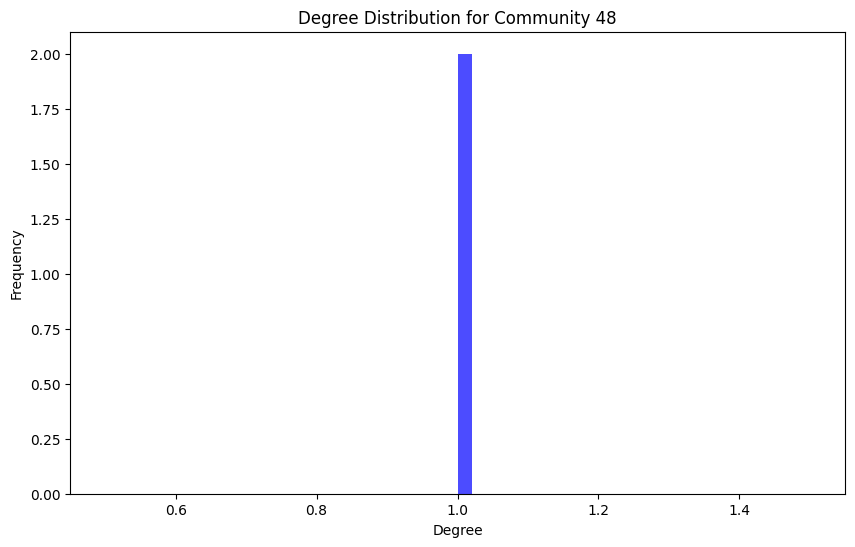

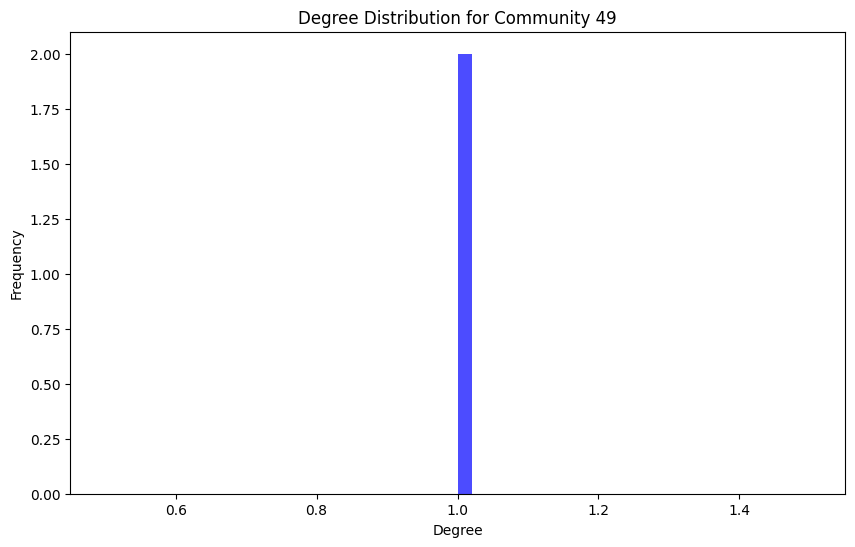

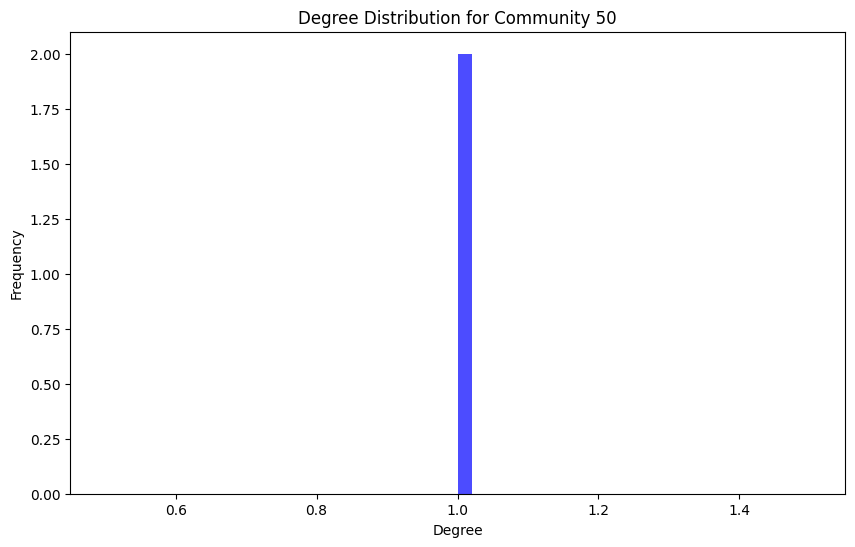

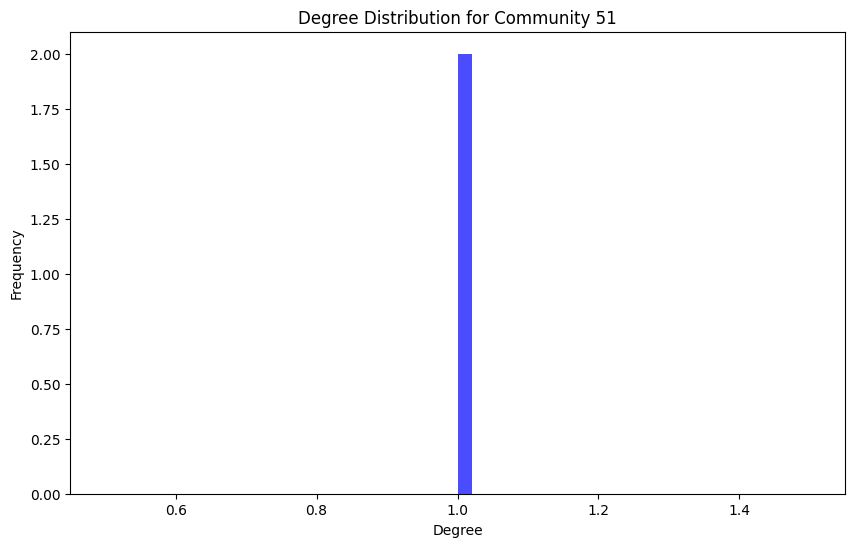

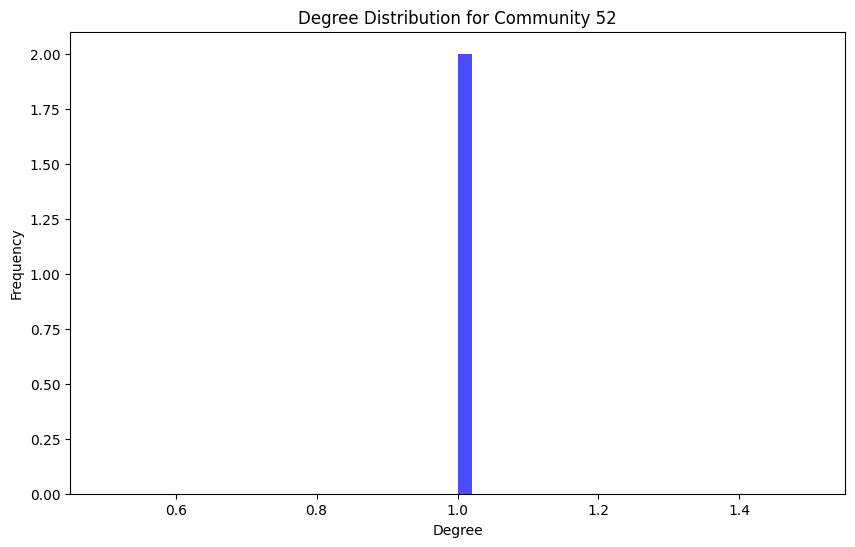

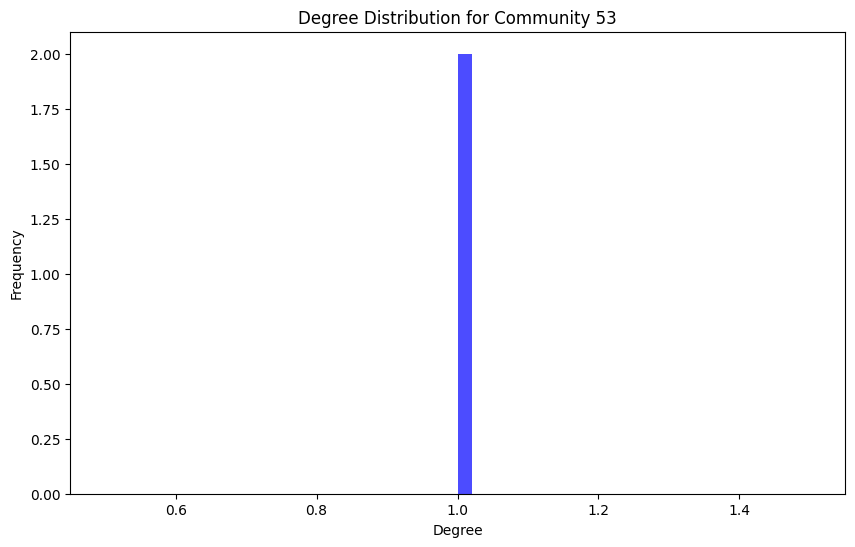

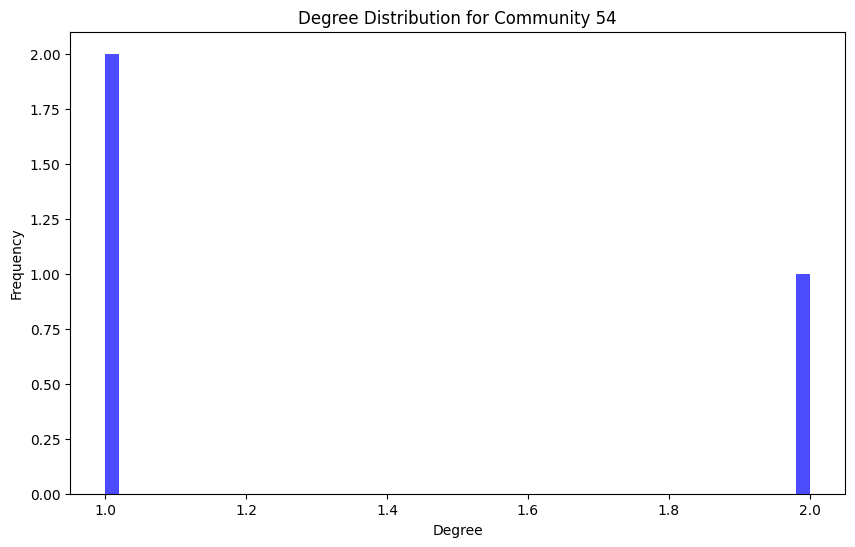

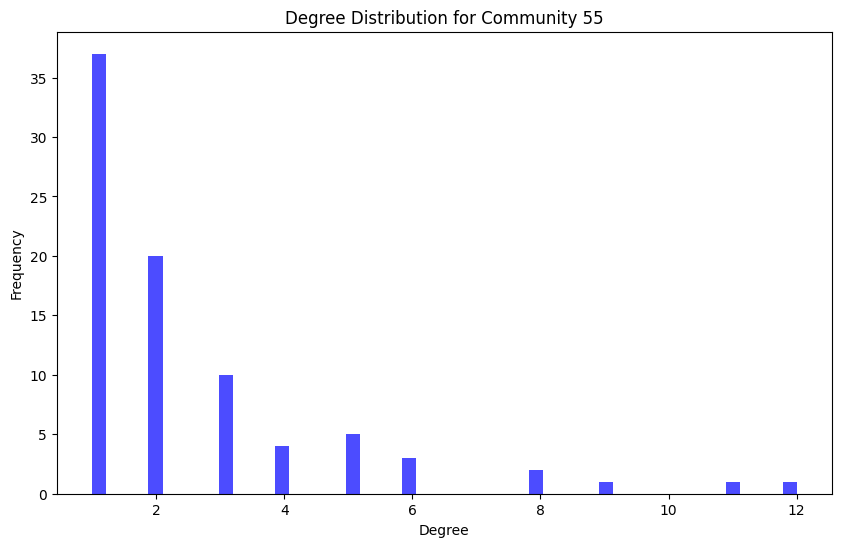

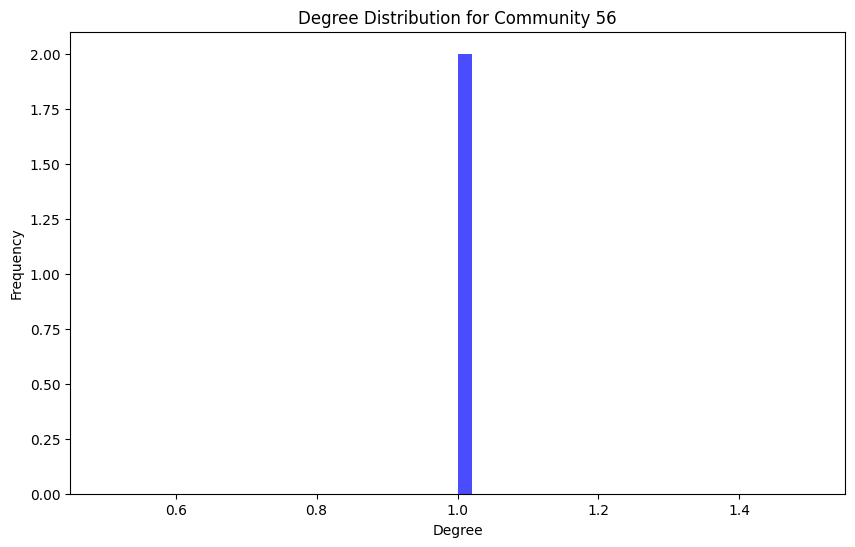

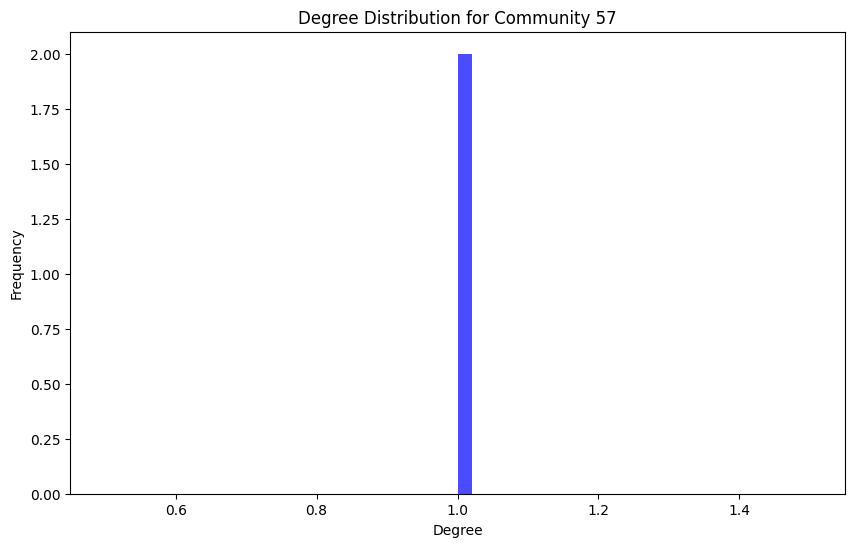

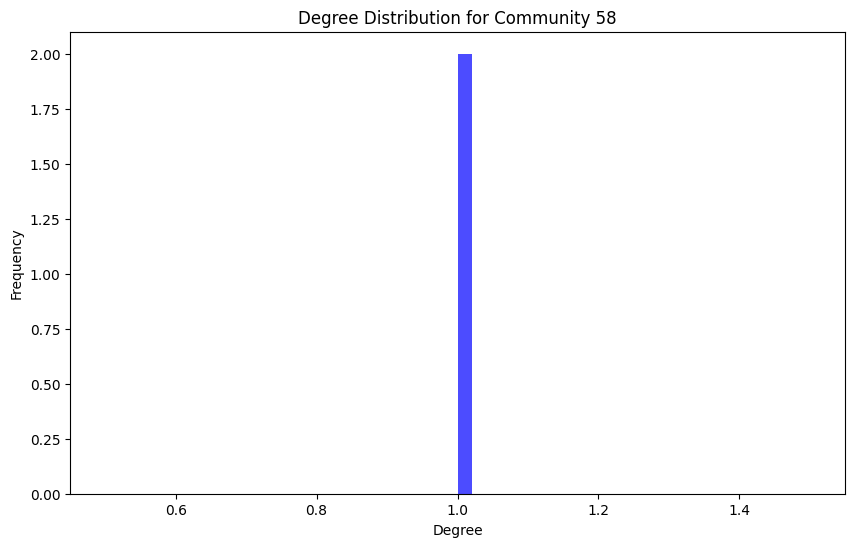

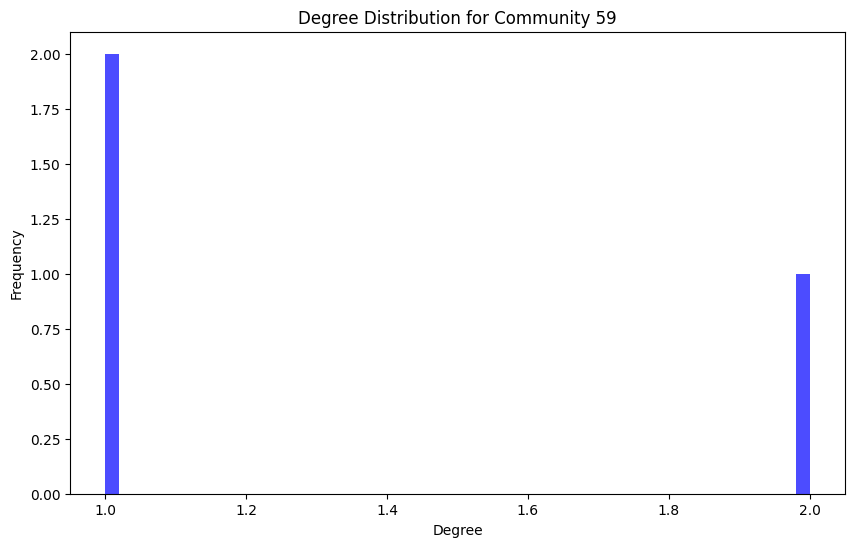

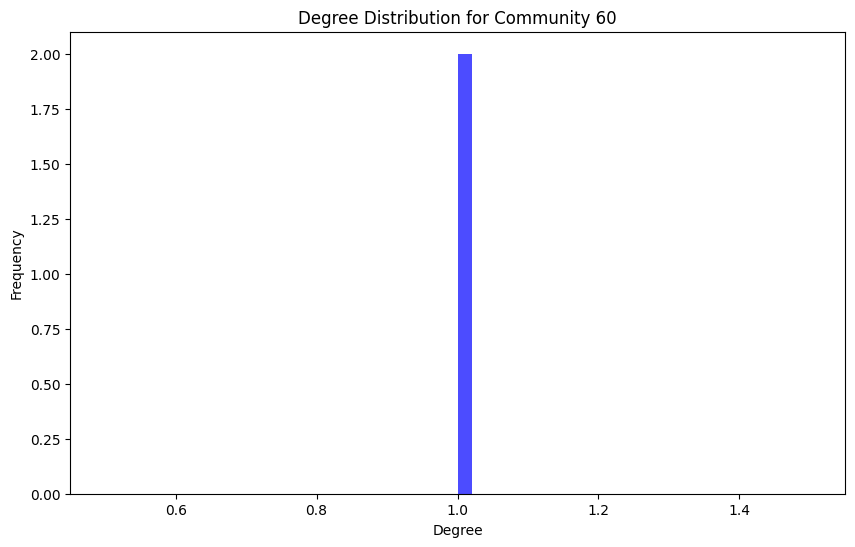

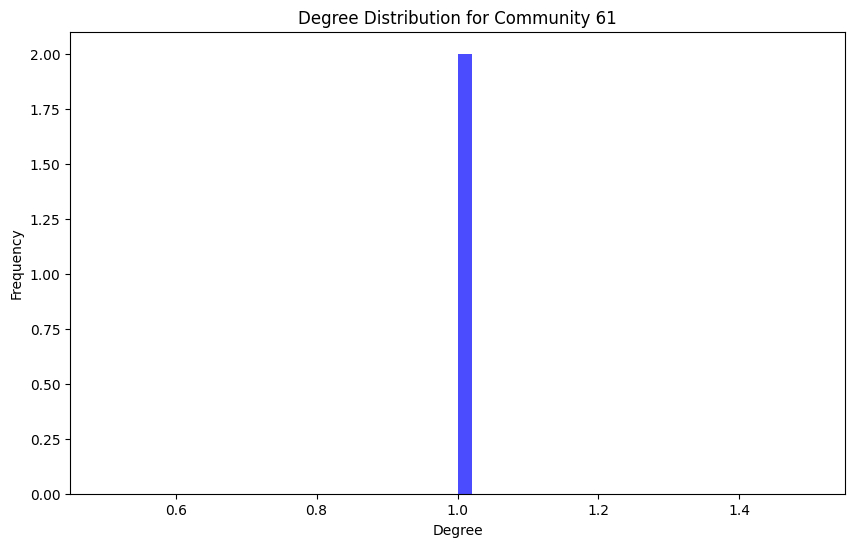

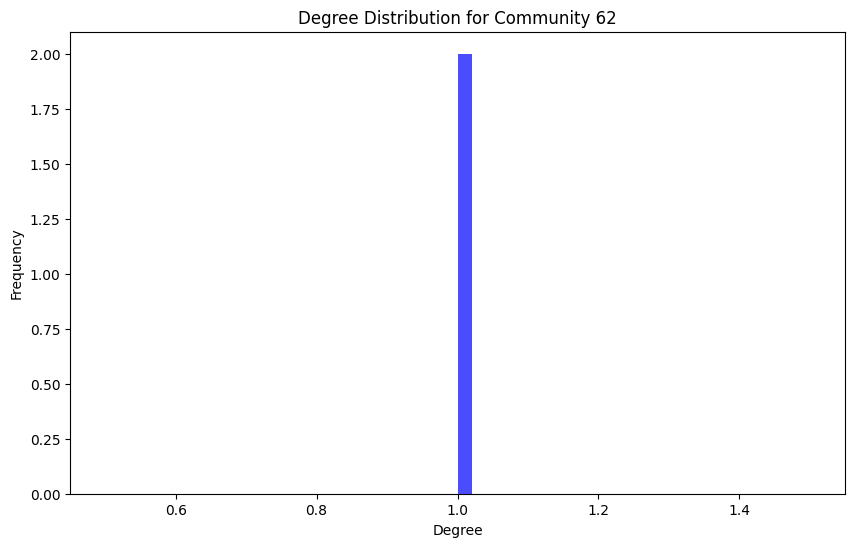

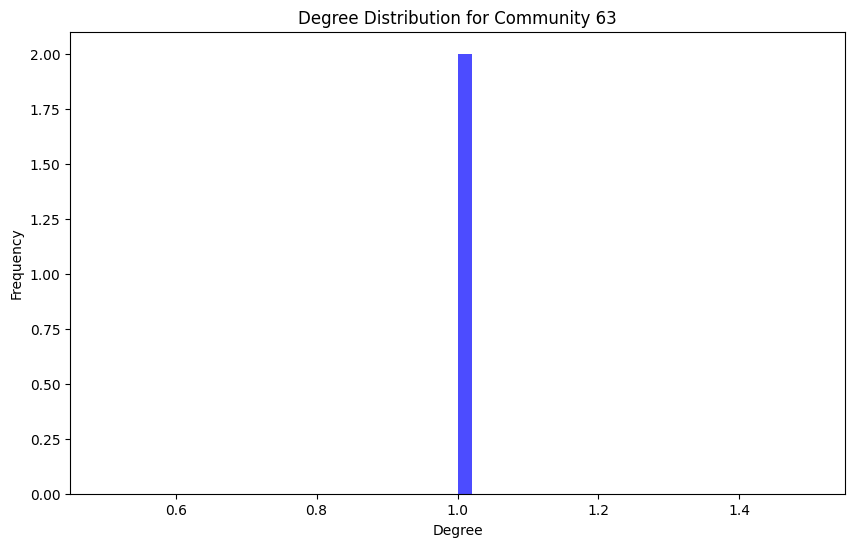

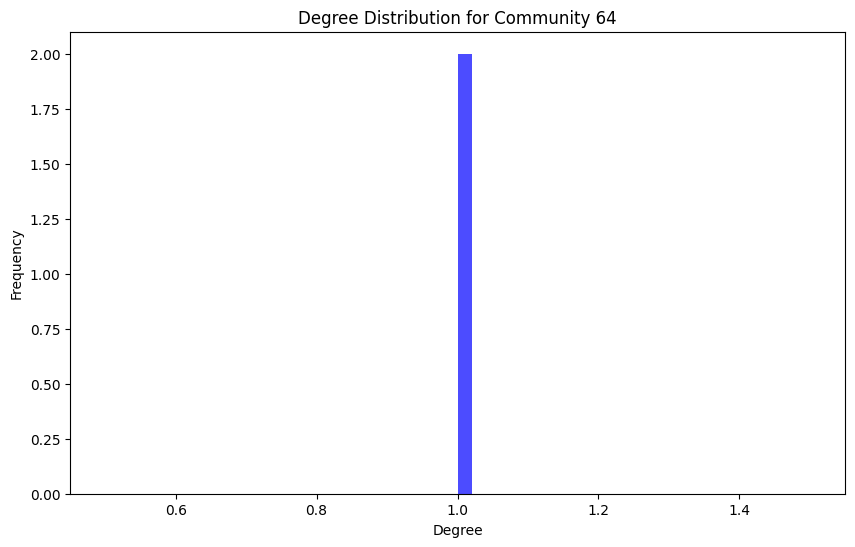

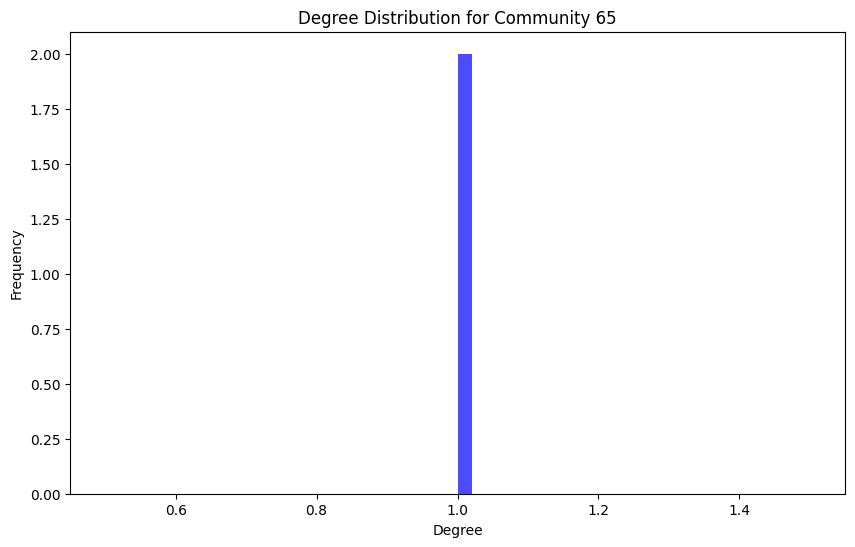

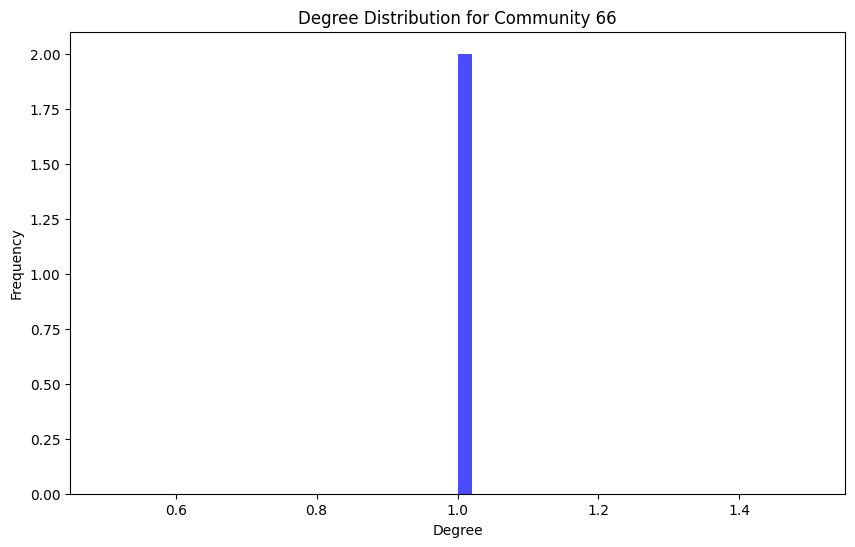

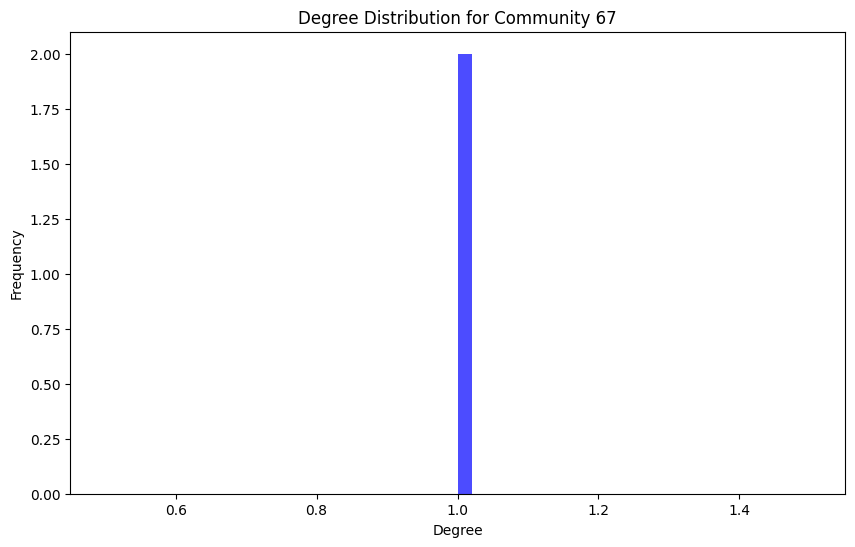

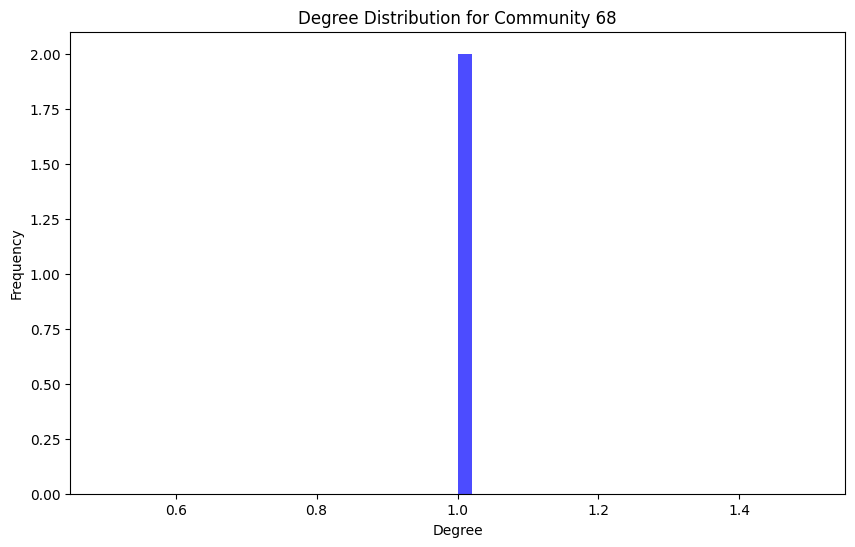

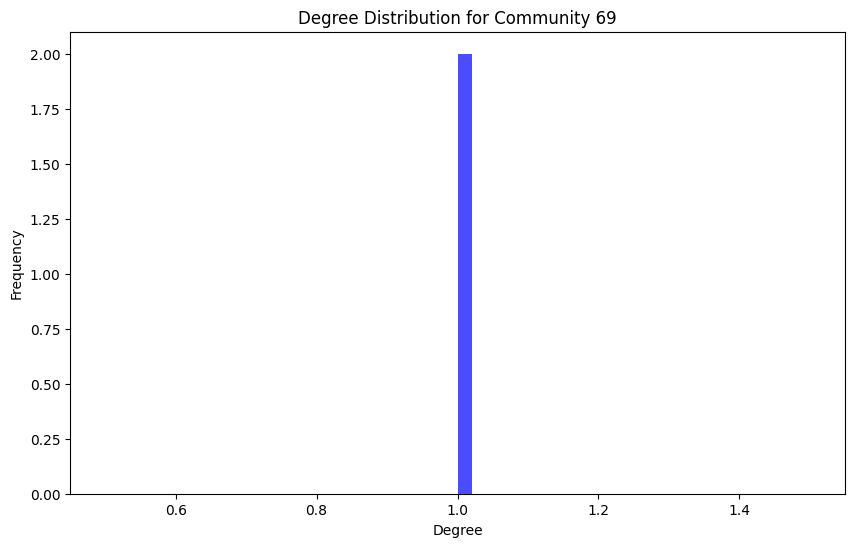

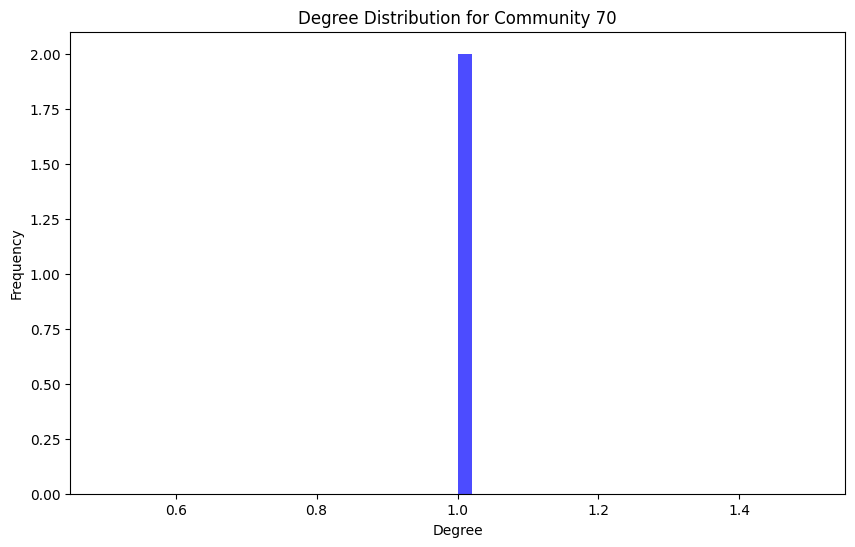

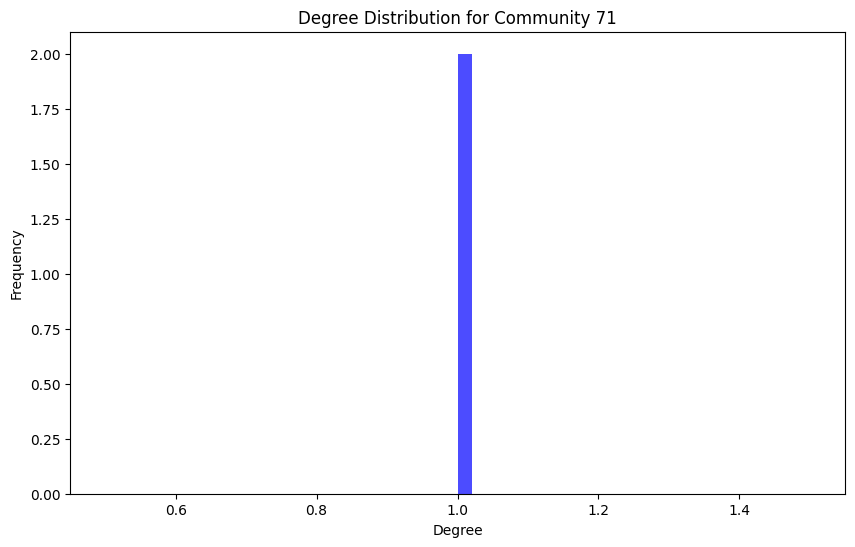

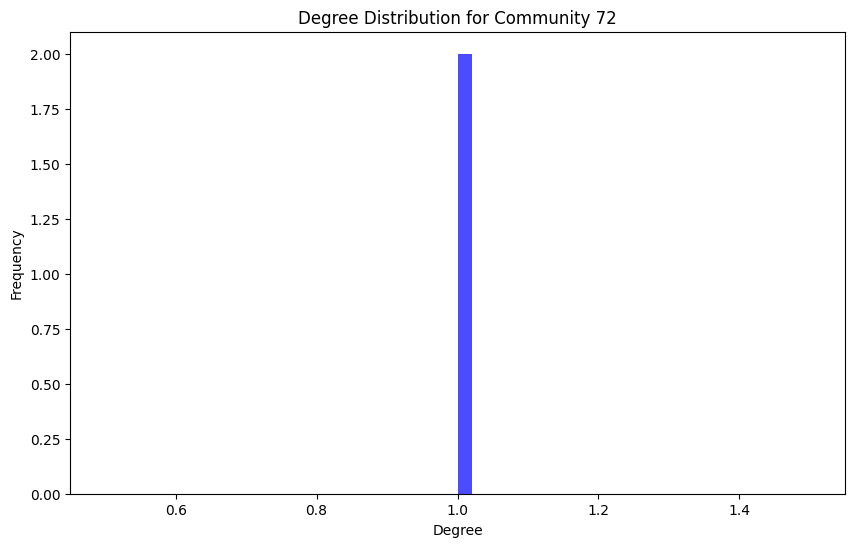

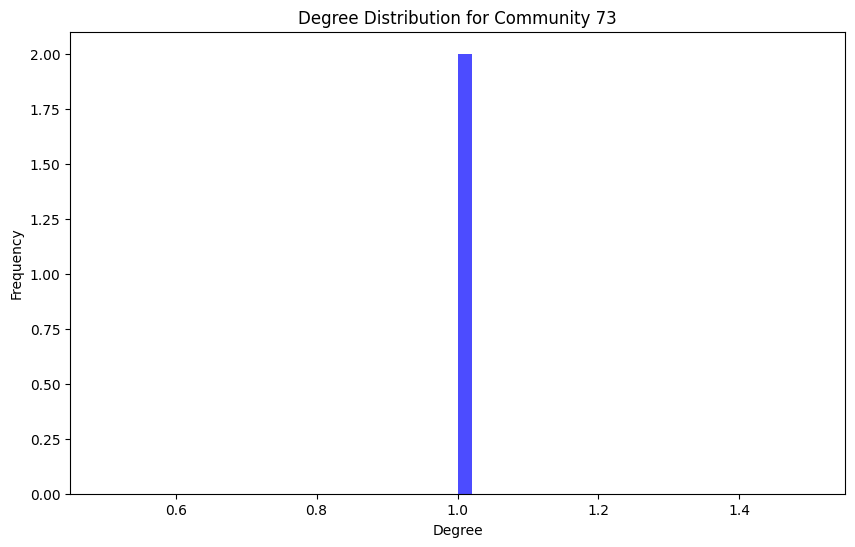

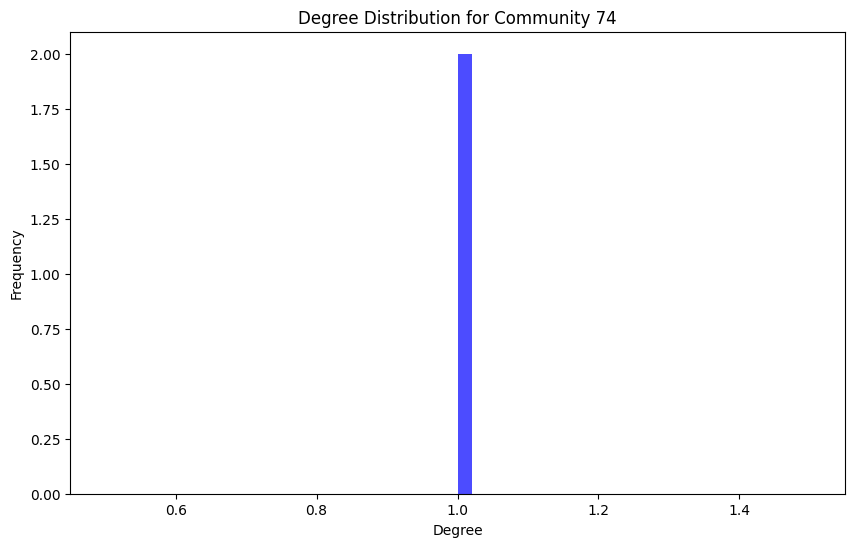

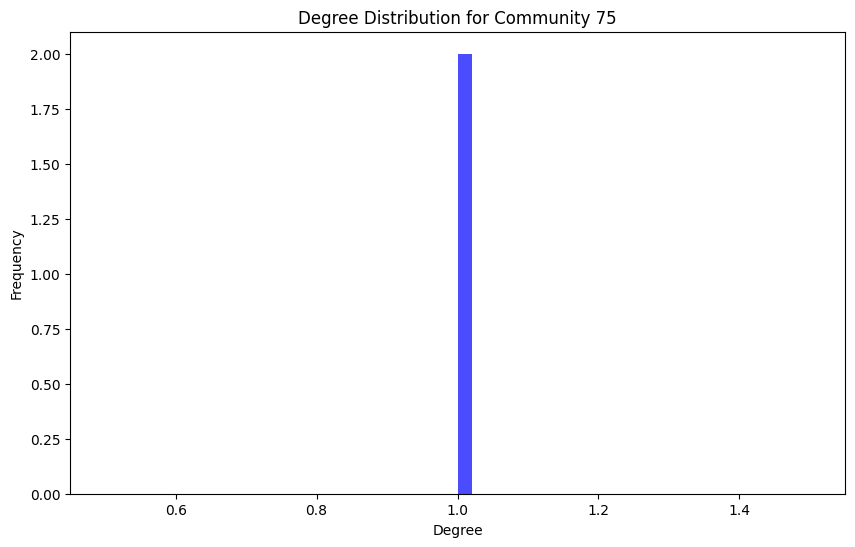

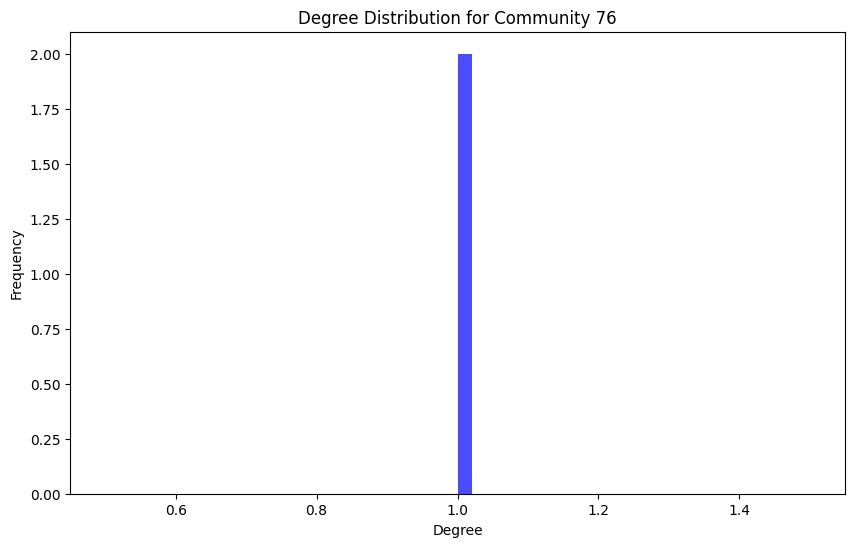

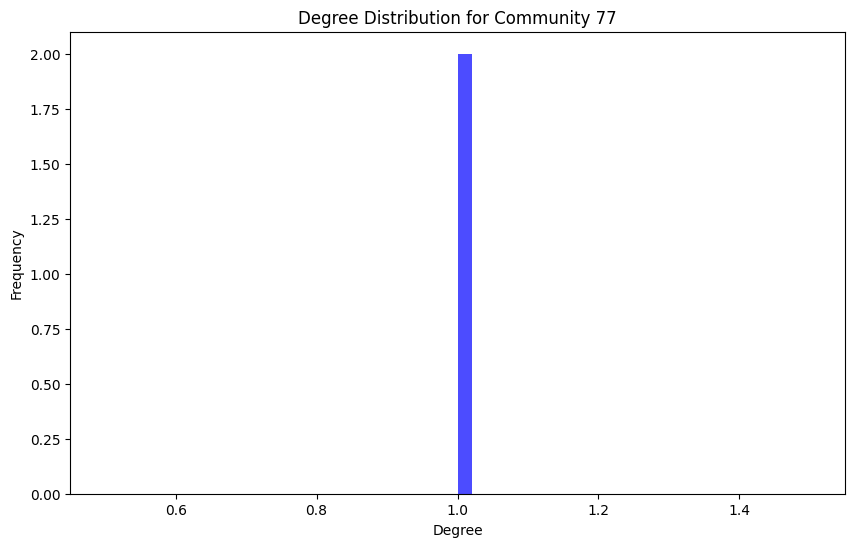

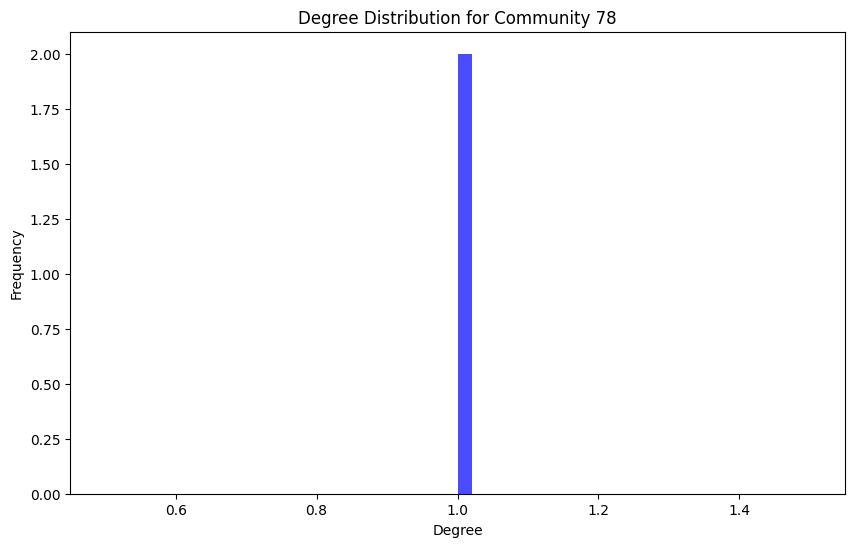

({0: 263,
  1: 54,
  2: 181,
  3: 106,
  4: 153,
  5: 50,
  6: 35,
  7: 101,
  8: 130,
  9: 120,
  10: 2,
  11: 189,
  12: 2,
  13: 2,
  14: 2,
  15: 53,
  16: 168,
  17: 2,
  18: 21,
  19: 2,
  20: 51,
  21: 7,
  22: 2,
  23: 51,
  24: 146,
  25: 208,
  26: 78,
  27: 3,
  28: 2,
  29: 2,
  30: 2,
  31: 2,
  32: 2,
  33: 3,
  34: 2,
  35: 2,
  36: 2,
  37: 2,
  38: 3,
  39: 2,
  40: 2,
  41: 2,
  42: 2,
  43: 2,
  44: 2,
  45: 5,
  46: 2,
  47: 3,
  48: 2,
  49: 2,
  50: 2,
  51: 2,
  52: 2,
  53: 2,
  54: 3,
  55: 84,
  56: 2,
  57: 2,
  58: 2,
  59: 3,
  60: 2,
  61: 2,
  62: 2,
  63: 2,
  64: 2,
  65: 2,
  66: 2,
  67: 2,
  68: 2,
  69: 2,
  70: 2,
  71: 2,
  72: 2,
  73: 2,
  74: 2,
  75: 2,
  76: 2,
  77: 2,
  78: 2},
 {0: [(6250, 0.7872805268687895),
   (23195, 0.17346151987500774),
   (92773, 0.15886203247763755),
   (54701, 0.11807603302605038),
   (165361, 0.07963774428353226),
   (22189, 0.039340940267728754),
   (24110, 0.037295058075175455),
   (37268, 0.03228801159263409),

In [2]:
# Assign community labels to nodes
community_map = {}
for i, com in enumerate(communities):
    for node in com:
        community_map[node] = i
nx.set_node_attributes(G, community_map, 'community')

# Analyze the size of each community
community_sizes = {i: len(com) for i, com in enumerate(communities)}

# Examine degree distribution within each community
degree_distributions = {}
for i in range(num_communities):
    subgraph = G.subgraph(communities[i])
    degree_sequence = sorted([d for n, d in subgraph.degree()], reverse=True)
    degree_distributions[i] = degree_sequence

# Identify the top nodes by centrality measures within each community
top_nodes_by_community = {}
for i in range(num_communities):
    subgraph = G.subgraph(communities[i])
    betweenness_centrality = nx.betweenness_centrality(subgraph)
    top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
    top_nodes_by_community[i] = top_10_betweenness

# Plot degree distribution for each community
for i, degree_sequence in degree_distributions.items():
    plt.figure(figsize=(10, 6))
    plt.hist(degree_sequence, bins=50, color='blue', alpha=0.7)
    plt.title(f'Degree Distribution for Community {i}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Results
community_sizes, top_nodes_by_community

In [3]:
import pandas as pd
import networkx as nx
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

features['community'] = features['numeric_id'].map(community_map)
features['degree'] = features['numeric_id'].map(dict(G.degree()))
features['betweenness_centrality'] = features['numeric_id'].map(nx.betweenness_centrality(G))
features['closeness_centrality'] = features['numeric_id'].map(nx.closeness_centrality(G))
features['eigenvector_centrality'] = features['numeric_id'].map(nx.eigenvector_centrality(G, max_iter=1000))

# Prepare the target variable (assuming 'explicit_content' is the target column)
target = 'mature'
X = features.drop(columns=['numeric_id', target])
y = features[target]

# Convert non-numeric features to numeric codes
X = X.apply(lambda col: pd.Categorical(col).codes if col.dtype == 'object' else col)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Results
print("accuracy")
print(accuracy)

print("report")
print(report)


accuracy
0.6083333333333333
report
              precision    recall  f1-score   support

           0       0.60      0.67      0.64       609
           1       0.62      0.54      0.58       591

    accuracy                           0.61      1200
   macro avg       0.61      0.61      0.61      1200
weighted avg       0.61      0.61      0.61      1200



In [4]:
# Prepare the node features
features['community'] = features['numeric_id'].map(community_map)
features['degree'] = features['numeric_id'].map(dict(G.degree()))
features['betweenness_centrality'] = features['numeric_id'].map(nx.betweenness_centrality(G))
features['closeness_centrality'] = features['numeric_id'].map(nx.closeness_centrality(G))
features['eigenvector_centrality'] = features['numeric_id'].map(nx.eigenvector_centrality(G, max_iter=1000))

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features.select_dtypes(include=[np.number]))
features_imputed_df = pd.DataFrame(features_imputed, columns=features.select_dtypes(include=[np.number]).columns)

# Analyze common attributes in each community
community_attributes = features_imputed_df.groupby('community').mean()

# Results
community_attributes


,Unnamed: 0,views,mature,life_time,numeric_id,dead_account,language,affiliate,degree,betweenness_centrality,closeness_centrality,eigenvector_centrality
community,,,,,,,,,,,,
0.0,77357.718631,657063.596958,0.486692,1576.730038,77356.718631,0.022814,3.041825,0.448669,5.091255,0.001575,0.264914,2.002449e-02
1.0,85233.629630,58499.444444,0.629630,1811.518519,85232.629630,0.055556,2.240741,0.574074,3.277778,0.000722,0.233101,5.324818e-03
2.0,88887.121547,379136.176796,0.546961,1554.060773,88886.121547,0.038674,2.596685,0.497238,4.392265,0.001503,0.252992,1.663042e-02
3.0,82789.792453,468289.207547,0.386792,1405.028302,82788.792453,0.009434,2.632075,0.471698,3.613208,0.001167,0.237237,6.808544e-03
4.0,77397.562092,69366.607843,0.601307,1448.771242,77396.562092,0.013072,1.418301,0.607843,4.254902,0.000891,0.233419,5.686622e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
74.0,103927.000000,4636.000000,1.000000,1381.000000,103926.000000,0.000000,4.000000,0.500000,1.000000,0.000000,0.000421,2.973828e-52
75.0,95346.500000,1505.500000,0.500000,435.000000,95345.500000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000421,2.973828e-52
76.0,105965.000000,19522.500000,0.500000,695.500000,105964.000000,0.000000,9.000000,1.000000,1.000000,0.000000,0.000421,2.973828e-52


In [5]:
import random

# Step 2: Simplified Influential User Identification
# Identify the most influential users by degree and closeness centrality within each community
top_influential_users = {}
for i in range(len(communities)):
    subgraph = G.subgraph(communities[i])
    top_degree = sorted(subgraph.degree, key=lambda x: x[1], reverse=True)[:5]
    top_closeness = sorted(nx.closeness_centrality(subgraph).items(), key=lambda x: x[1], reverse=True)[:5]
    
    top_influential_users[i] = {
        'top_degree': top_degree,
        'top_closeness': top_closeness
    }

# Step 3: Simulating Information Propagation
def independent_cascade_model(G, seeds, steps=3):
    # Initialize the set of active nodes
    active = set(seeds)
    # Record the active nodes in each step
    activation_steps = [set(seeds)]
    
    for step in range(steps):
        new_active = set()
        for node in activation_steps[-1]:
            neighbors = set(G.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in active and random.random() < 0.1:  # Probability of influence
                    new_active.add(neighbor)
        activation_steps.append(new_active)
        active.update(new_active)
    
    return activation_steps

# Simulate information propagation from top nodes in each community
information_propagation = {}
for i in range(len(communities)):
    top_node = top_influential_users[i]['top_degree'][0][0]  # Using top degree node as seed
    propagation_steps = independent_cascade_model(G.subgraph(communities[i]), [top_node])
    information_propagation[i] = propagation_steps

# Results
community_attributes, top_influential_users, information_propagation


(              Unnamed: 0          views    mature    life_time     numeric_id  \
 community                                                                       
 0.0         77357.718631  657063.596958  0.486692  1576.730038   77356.718631   
 1.0         85233.629630   58499.444444  0.629630  1811.518519   85232.629630   
 2.0         88887.121547  379136.176796  0.546961  1554.060773   88886.121547   
 3.0         82789.792453  468289.207547  0.386792  1405.028302   82788.792453   
 4.0         77397.562092   69366.607843  0.601307  1448.771242   77396.562092   
 ...                  ...            ...       ...          ...            ...   
 74.0       103927.000000    4636.000000  1.000000  1381.000000  103926.000000   
 75.0        95346.500000    1505.500000  0.500000   435.000000   95345.500000   
 76.0       105965.000000   19522.500000  0.500000   695.500000  105964.000000   
 77.0       136959.500000     286.500000  0.000000  1363.000000  136958.500000   
 78.0       1277

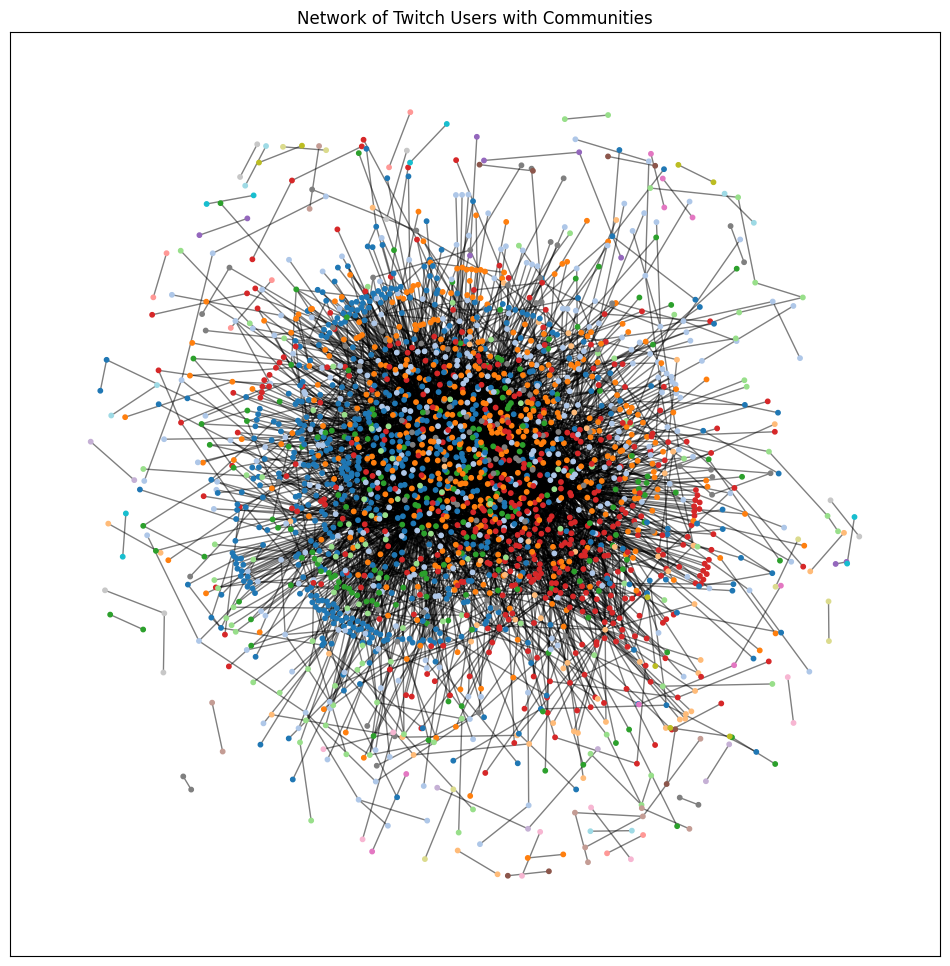

In [6]:
# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # positions for all nodes

# Draw nodes with colors based on community
colors = [community_map[node] for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=10)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Show plot
plt.title("Network of Twitch Users with Communities")
plt.show()